## ANÁLISIS FINAL - EXPLORACIÓN Y PREDICCIÓN

In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importamos las 3 tablas
* General, con tantas filas como evaluaciones hay --> final_df (859643, 64)
* Tweets únicos, filtrado por tweet_id único --> tuits_unicos (4475, 64)
* Notas únicas, filtrado por noteId única --> tuits_notas_unicas (10137, 64)

In [ ]:
csv_path = '/content/drive/MyDrive/TFM/community_notes_final_data.csv'
final_df = pd.read_csv(csv_path)


# Mostrar las primeras filas para confirmar
final_df.head()

/tmp/ipython-input-145-3890154167.py:2: DtypeWarning: Columns (60) have mixed types. Specify dtype option on import or set low_memory=False.
  final_df = pd.read_csv(csv_path)


,tweet_id,tweet_text,views,replies,reposts,likes,bookmarks,noteId,noteAuthorParticipantId,createdAtMillis,...,timestampMillisOfFirstNonNMRStatus,num_ratings,num_ratings_HELPFUL,num_ratings_NOT_HELPFUL,num_ratings_SOMEWHAT_HELPFUL,tweet_clean,note_clean,note_length,tweet_length,tweet_language
0,1881764276169535754,Eduardo Garzón\n@edugaresp\nEn Argentina la in...,241700.0,264.0,23.0,28.0,13.0,1890259955376353504,C1E44FDF383308595A9BBD1A45572ACEACFB44730F8D6A...,1739508067350,...,NaN,68,68,0,0,En Argentina la inflación ha vuelto a aumentar...,La inflación sigue bajando y está en su valor ...,73,156,es
1,1881764276169535754,Eduardo Garzón\n@edugaresp\nEn Argentina la in...,241700.0,264.0,23.0,28.0,13.0,1890259955376353504,C1E44FDF383308595A9BBD1A45572ACEACFB44730F8D6A...,1739508067350,...,NaN,68,68,0,0,En Argentina la inflación ha vuelto a aumentar...,La inflación sigue bajando y está en su valor ...,73,156,es
2,1881764276169535754,Eduardo Garzón\n@edugaresp\nEn Argentina la in...,241700.0,264.0,23.0,28.0,13.0,1890259955376353504,C1E44FDF383308595A9BBD1A45572ACEACFB44730F8D6A...,1739508067350,...,NaN,68,68,0,0,En Argentina la inflación ha vuelto a aumentar...,La inflación sigue bajando y está en su valor ...,73,156,es
3,1881764276169535754,Eduardo Garzón\n@edugaresp\nEn Argentina la in...,241700.0,264.0,23.0,28.0,13.0,1890259955376353504,C1E44FDF383308595A9BBD1A45572ACEACFB44730F8D6A...,1739508067350,...,NaN,68,68,0,0,En Argentina la inflación ha vuelto a aumentar...,La inflación sigue bajando y está en su valor ...,73,156,es
4,1881764276169535754,Eduardo Garzón\n@edugaresp\nEn Argentina la in...,241700.0,264.0,23.0,28.0,13.0,1890259955376353504,C1E44FDF383308595A9BBD1A45572ACEACFB44730F8D6A...,1739508067350,...,NaN,68,68,0,0,En Argentina la inflación ha vuelto a aumentar...,La inflación sigue bajando y está en su valor ...,73,156,es


In [ ]:
final_df.shape

(866469, 65)

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 859643 entries, 0 to 866468
Data columns (total 69 columns):
 #   Column                                  Non-Null Count   Dtype         
---  ------                                  --------------   -----         
 0   tweet_id                                859643 non-null  object        
 1   tweet_text                              859643 non-null  object        
 2   views                                   610425 non-null  Int64         
 3   replies                                 634911 non-null  Int64         
 4   reposts                                 638215 non-null  Int64         
 5   likes                                   638215 non-null  Int64         
 6   bookmarks                               638720 non-null  Int64         
 7   noteId                                  859643 non-null  object        
 8   noteAuthorParticipantId                 859643 non-null  object        
 9   createdAtMillis                         85

In [ ]:
final_df.columns

Index(['tweet_id', 'tweet_text', 'views', 'replies', 'reposts', 'likes',
       'bookmarks', 'noteId', 'noteAuthorParticipantId', 'createdAtMillis',
       'classification', 'misleadingOther', 'misleadingFactualError',
       'misleadingManipulatedMedia', 'misleadingOutdatedInformation',
       'misleadingMissingImportantContext', 'misleadingUnverifiedClaimAsFact',
       'misleadingSatire', 'notMisleadingOther',
       'notMisleadingFactuallyCorrect',
       'notMisleadingOutdatedButNotWhenWritten', 'notMisleadingClearlySatire',
       'notMisleadingPersonalOpinion', 'trustworthySources', 'summary',
       'isMediaNote', 'currentStatus', 'firstNonNMRStatus',
       'mostRecentNonNMRStatus', 'lockedStatus', 'raterParticipantId',
       'ratingCreatedAtMillis', 'agree', 'disagree', 'helpfulnessLevel',
       'helpfulOther', 'helpfulClear', 'helpfulGoodSources',
       'helpfulAddressesClaim', 'notHelpfulOther', 'notHelpfulIncorrect',
       'notHelpfulSourcesMissingOrUnreliable', 'notHe

In [ ]:
def convertir_tipos(df):
    # identificadores
    df['tweet_id'] = df['tweet_id'].astype(str)
    df['noteId'] = df['noteId'].astype(str)
    if 'noteAuthorParticipantId' in df.columns:
        df['noteAuthorParticipantId'] = df['noteAuthorParticipantId'].astype(str)
    if 'raterParticipantId' in df.columns:
        df['raterParticipantId'] = df['raterParticipantId'].astype(str)

    # FECHAS bien mapeadas:
    if 'createdAtMillis' in df.columns:
        df['noteCreatedAt'] = pd.to_datetime(df['createdAtMillis'], unit='ms', errors='coerce')
    if 'ratingCreatedAtMillis' in df.columns:
        df['ratingCreatedAt'] = pd.to_datetime(df['ratingCreatedAtMillis'], unit='ms', errors='coerce')
    if 'timestampMillisOfCurrentStatus' in df.columns:
        df['timeCurrentStatus'] = pd.to_datetime(df['timestampMillisOfCurrentStatus'], unit='ms', errors='coerce')
    if 'timestampMillisOfLatestNonNMRStatus' in df.columns:
        df['timeOfLatestNonNMRStatus'] = pd.to_datetime(df['timestampMillisOfLatestNonNMRStatus'], unit='ms', errors='coerce')
    if 'timestampOfLastStateChange' in df.columns:
        df['timestampOfLastStateChange'] = pd.to_datetime(df['timestampOfLastStateChange'], unit='ms', errors='coerce')
    if 'timestampOfLastEarnOut' in df.columns:
        df['timestampOfLastEarnOut'] = pd.to_datetime(df['timestampOfLastEarnOut'], unit='ms', errors='coerce')

    # booleanos
    misleading_cols = [col for col in df.columns if 'misleading' in col.lower()]
    for col in misleading_cols:
        df[col] = df[col].astype(bool)

    for col in ['isMediaNote', 'trustworthySources']:
        if col in df.columns:
            df[col] = df[col].astype(bool)

    bool_cols = [
        'agree', 'disagree',
        'helpfulOther', 'helpfulClear', 'helpfulGoodSources', 'helpfulAddressesClaim',
        'notHelpfulOther', 'notHelpfulIncorrect', 'notHelpfulSourcesMissingOrUnreliable',
        'notHelpfulMissingKeyPoints', 'notHelpfulHardToUnderstand',
        'notHelpfulArgumentativeOrBiased', 'notHelpfulSpamHarassmentOrAbuse',
        'notHelpfulIrrelevantSources', 'notHelpfulOpinionSpeculation',
        'notHelpfulNoteNotNeeded'
    ]
    for col in bool_cols:
        if col in df.columns:
            df[col] = df[col].astype(bool)

    # categóricas
    categorical_cols = [
        'classification', 'currentStatus', 'firstNonNMRStatus',
        'mostRecentNonNMRStatus', 'lockedStatus', 'helpfulnessLevel', 'enrollmentState'
    ]
    for col in categorical_cols:
        if col in df.columns:
            df[col] = df[col].astype('category')

    # numéricas
    numeric_cols = ['views', 'likes', 'replies', 'reposts', 'bookmarks']
    for col in numeric_cols:
        if col in df.columns:
            df[col] = df[col].astype('Int64')

    return df

# aplicar a cada tabla
final_df = convertir_tipos(final_df)


In [ ]:
unicos_tweets = final_df['tweet_id'].nunique()
print(f"Número de tweet_id únicos: {unicos_tweets}")

unicas_notas = final_df['noteId'].nunique()
print(f"Número de note_id únicos: {unicas_notas}")

Número de tweet_id únicos: 4532
Número de note_id únicos: 10237


In [ ]:
# Obtener la última fecha de nota
ultimo_tweet_fecha = final_df['noteCreatedAt'].max()
print("Última fecha de nota en el dataset:", ultimo_tweet_fecha)

# Definir umbral: dos semanas antes de la fecha máxima
umbral_fecha = ultimo_tweet_fecha - pd.Timedelta(weeks=2) #Eliminamos las notas creadas en las últimas dos semanas porque aún no han adquirido su status final
print("Umbral de corte:", umbral_fecha)

# Filtrar: conservar solo notas anteriores o iguales al umbral
filtered = final_df[final_df['noteCreatedAt'] <= umbral_fecha].copy()

# Sobrescribir final_df
final_df = filtered

# Comprobaciones finales
print(f"Dimensiones finales tras filtrar: {final_df.shape}")
print("Nueva fecha máxima tras filtrar:", final_df['noteCreatedAt'].max())

#Eliminamos las notas de las 2 semanas más recientes ya que aún no se ha estabilizado el status

Última fecha de nota en el dataset: 2025-04-26 17:30:55.013000
Umbral de corte: 2025-04-12 17:30:55.013000
Dimensiones finales tras filtrar: (859643, 69)
Nueva fecha máxima tras filtrar: 2025-04-12 14:07:36.672000


In [ ]:
# Obtener fecha de la nota más antigua
fecha_mas_antigua = final_df['noteCreatedAt'].min()

# Obtener fecha de la nota más reciente
fecha_mas_reciente = final_df['noteCreatedAt'].max()

print(" Nota más antigua:", fecha_mas_antigua)
print(" Nota más reciente:", fecha_mas_reciente)

 Nota más antigua: 2022-11-17 16:37:55.364000
 Nota más reciente: 2025-04-12 14:07:36.672000


Subdatasets

In [ ]:
csv_path = '/content/drive/MyDrive/TFM/tuits_unicos.csv'
tuits_unicos = pd.read_csv(csv_path)


# Mostrar las primeras filas para confirmar
tuits_unicos.shape


(4532, 65)

In [ ]:
csv_path = '/content/drive/MyDrive/TFM/tuits_notas_unicas.csv'
tuits_notas_unicas = pd.read_csv(csv_path)


# Mostrar las primeras filas para confirmar
tuits_notas_unicas.shape


(10237, 65)

In [ ]:
tuits_notas_unicas.columns

Index(['tweet_id', 'tweet_text', 'views', 'replies', 'reposts', 'likes',
       'bookmarks', 'noteId', 'noteAuthorParticipantId', 'createdAtMillis',
       'classification', 'misleadingOther', 'misleadingFactualError',
       'misleadingManipulatedMedia', 'misleadingOutdatedInformation',
       'misleadingMissingImportantContext', 'misleadingUnverifiedClaimAsFact',
       'misleadingSatire', 'notMisleadingOther',
       'notMisleadingFactuallyCorrect',
       'notMisleadingOutdatedButNotWhenWritten', 'notMisleadingClearlySatire',
       'notMisleadingPersonalOpinion', 'trustworthySources', 'summary',
       'isMediaNote', 'currentStatus', 'firstNonNMRStatus',
       'mostRecentNonNMRStatus', 'lockedStatus', 'raterParticipantId',
       'ratingCreatedAtMillis', 'agree', 'disagree', 'helpfulnessLevel',
       'helpfulOther', 'helpfulClear', 'helpfulGoodSources',
       'helpfulAddressesClaim', 'notHelpfulOther', 'notHelpfulIncorrect',
       'notHelpfulSourcesMissingOrUnreliable', 'notHe

In [ ]:
tuits_unicos = convertir_tipos(tuits_unicos)
tuits_notas_unicas = convertir_tipos(tuits_notas_unicas)

# Tamaño

In [ ]:
unicos_tweets = final_df['tweet_id'].nunique()
print(f"Número de tweet_id únicos: {unicos_tweets}")

unicas_notas = final_df['noteId'].nunique()
print(f"Número de note_id únicos: {unicas_notas}")

ratings=final_df['helpfulnessLevel'].count()
print(f"Número de ratings: {ratings}")

Número de tweet_id únicos: 4475
Número de note_id únicos: 10137
Número de ratings: 859643


10.137 notas sobre 4.475 tweets; pero un total de 859k valoraciones

# Análisis univariante

### ¿Cómo son los tweets de la muestra?

In [ ]:
# Selección de columnas numéricas de interés
columnas_numericas = ['views', 'likes', 'replies', 'reposts', 'bookmarks']

# Descripción estadística solo sobre tuits únicos
resumen_numerico = tuits_unicos[columnas_numericas].describe()

print(resumen_numerico)

                views        likes      replies      reposts      bookmarks
count          2978.0       3179.0       3148.0       3179.0         3182.0
mean   1034505.490262  9848.172067   1301.06385  2170.013526   32378.956003
std    3014228.605586  28777.29864  6514.806343  5459.126839  889077.991787
min               1.0          1.0          1.0          1.0            1.0
25%           72725.0        709.0       103.75        268.0           18.0
50%          269850.0       2800.0        334.0        883.0           70.0
75%          905650.0       9100.0       963.25       2300.0          279.0
max        82200000.0     691000.0     247200.0     159000.0     39000000.0


In [ ]:
# Filtrar el tuit con ese valor exacto de bookmarks
tuit_extremo = tuits_unicos[tuits_unicos['bookmarks'] == 39000000]

# Mostrarlo
print(tuit_extremo)


                 tweet_id                                         tweet_text  \
2117  1744830840213848469  Elon Musk\n@elonmusk\n·\nJan 9, 2024\nYes\nQuo...   

      views  replies  reposts   likes  bookmarks               noteId  \
2117   <NA>    21000    67000  434000   39000000  1745267800183120161   

                                noteAuthorParticipantId  createdAtMillis  ...  \
2117  D4F075D1916E726ED213FB0390BE36F6A58A902D9F3C24...    1704939243729  ...   

     num_ratings_SOMEWHAT_HELPFUL  tweet_clean  \
2117                            1          NaN   

                                  note_clean  note_length  tweet_length  \
2117  NNN, opinión personal no necesita nota           38             0   

      tweet_language           noteCreatedAt         ratingCreatedAt  \
2117              en 2024-01-11 02:14:03.729 2024-01-11 14:37:02.414   

           timeCurrentStatus  timeOfLatestNonNMRStatus  
2117 2024-07-25 15:07:48.424                       NaT  

[1 rows x 69 colu

In [ ]:
# Definir umbrales del percentil 99 para cada métrica
percentiles_99 = {
    col: tuits_unicos[col].quantile(0.99)
    for col in ['views', 'likes', 'replies', 'reposts', 'bookmarks']
}

# Filtrar tuits que superan cualquiera de esos umbrales (son outliers extremos)
outliers_df = tuits_unicos[
    (tuits_unicos['views'] > percentiles_99['views']) |
    (tuits_unicos['likes'] > percentiles_99['likes']) |
    (tuits_unicos['replies'] > percentiles_99['replies']) |
    (tuits_unicos['reposts'] > percentiles_99['reposts']) |
    (tuits_unicos['bookmarks'] > percentiles_99['bookmarks'])
]

# Ver los resultados
print(outliers_df.shape)
outliers_df.sort_values(by='views', ascending=False).head()


(116, 69)


,tweet_id,tweet_text,views,replies,reposts,likes,bookmarks,noteId,noteAuthorParticipantId,createdAtMillis,...,num_ratings_SOMEWHAT_HELPFUL,tweet_clean,note_clean,note_length,tweet_length,tweet_language,noteCreatedAt,ratingCreatedAt,timeCurrentStatus,timeOfLatestNonNMRStatus
1192,1642976364080041984,Elon Musk\n@elonmusk\nSubscribe\nAs promised\n...,82200000,23000,63000,691000,4900,1643782078780014600,8DAA8BFCEA70A4D2F1B5A3F36CBAE7798878E42E347B5F...,1680743162233,...,1,As promised,the twitter is a twitter not a Dogtter,38,12,en,2023-04-06 01:06:02.233,2023-04-08 00:27:18.876,2024-11-16 07:13:16.887,2023-04-06 05:09:22.756
880,1682940387005026309,Elon Musk\n@elonmusk\nSubscribe\n4:27 AM · Jul...,67200000,6800,21000,441000,3800,1683071963038642180,CFC66591D8BB4408DC09F2DB8400E3870C9FA7EC206185...,1690110600614,...,3,NaN,Porque es una opinión personal de Elon Musk,43,0,en,2023-07-23 11:10:00.614,2023-07-23 14:27:48.640,2024-07-25 15:07:48.424,NaT
1962,1783181535337734409,Pedro Sánchez\n@sanchezcastejon\nCarta a la ci...,48800000,41000,38000,62000,5800,1783213691506418171,B715224C72E10BEC6CAB8ABC7A286119EFE686A00DCA11...,1713986249224,...,58,Carta a la ciudadanía.,NNN Si los fachas quieren seguir aferrándose a...,222,22,es,2024-04-24 19:17:29.224,2024-04-24 21:17:48.626,2024-07-25 15:07:48.424,2024-05-01 18:33:11.935
936,1713672720557203470,Elon Musk\n@elonmusk\nSubscribe\nI use both wo...,41700000,8600,16000,201000,2400,1713713753148035182,6B532B7B3E20DDA50B054D0AA0880CA5CA2F64D8457475...,1697416172670,...,1,I use both words a lot,"Se trata de una caricatura, una caricatura don...",188,23,en,2023-10-16 00:29:32.670,2023-10-16 01:32:01.942,2024-07-25 15:07:48.424,2023-10-16 21:47:44.278
1388,1831367252656173392,"lue \n@laluuelu\nel día de ayer, sucedió algo ...",25700000,1500,27000,165000,26000,1831824940854571052,23B95E42C6CCBE5060DBD7F84528F1EE1A91DC796E6B03...,1725576074219,...,6,"el día de ayer, sucedió algo terrible. Cuento ...","NNN - Un poco miserable la nota propuesta que,...",227,277,es,2024-09-05 22:41:14.219,2024-09-06 01:48:46.341,2024-09-19 21:36:12.979,NaT


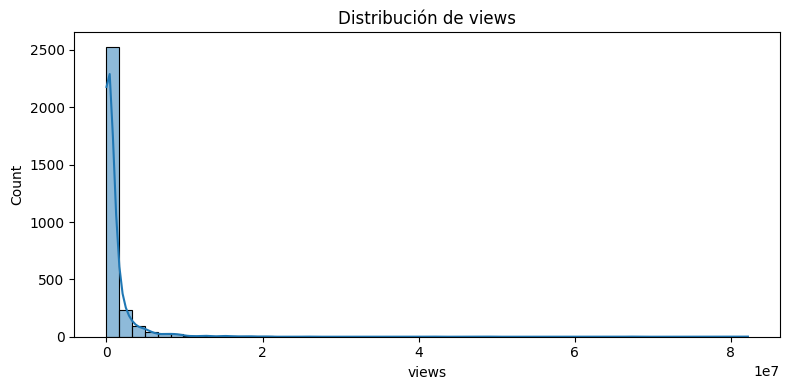

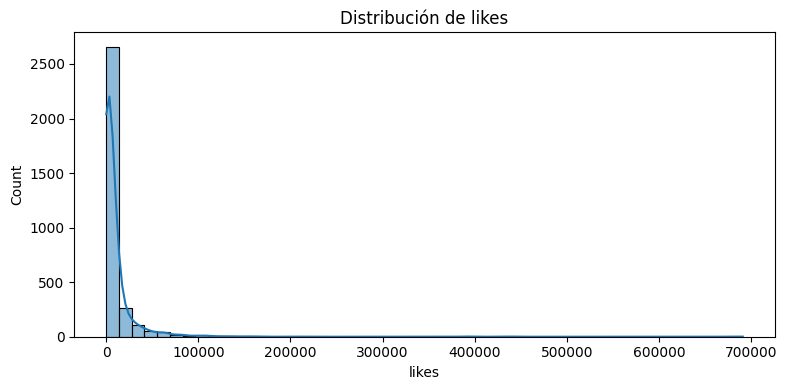

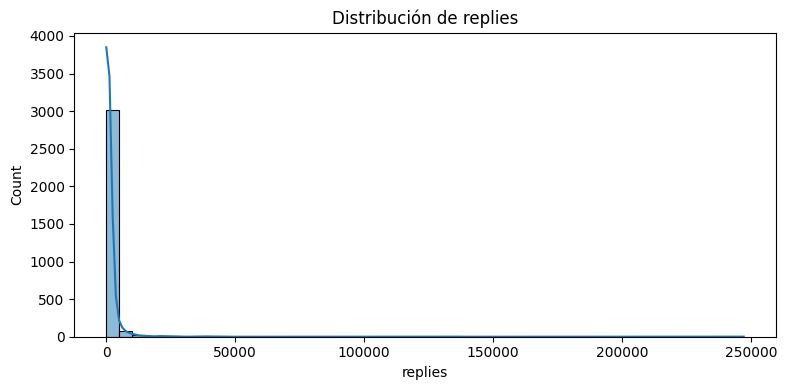

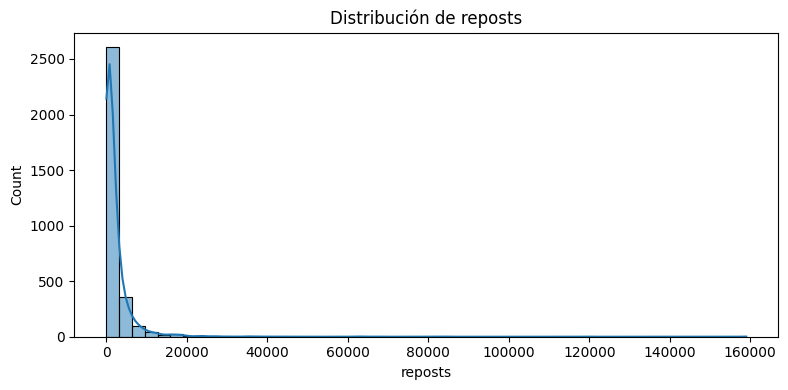

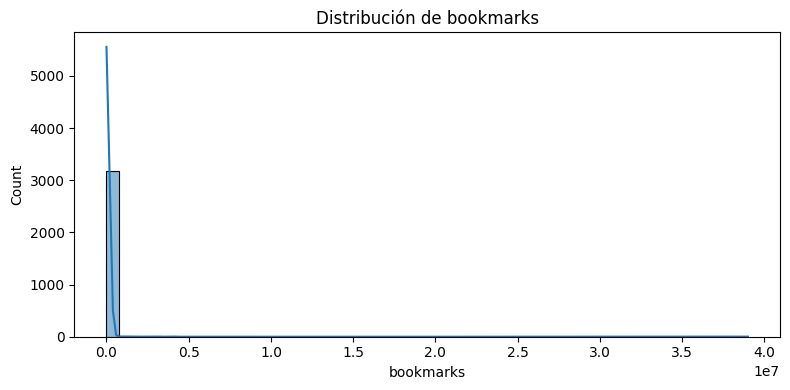

In [ ]:
# histograma metricas columnas numericas tuits_unicos
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar las columnas numéricas relevantes
columnas_numericas = ['views', 'likes', 'replies', 'reposts', 'bookmarks']

for col in columnas_numericas:
    plt.figure(figsize=(8, 4))
    sns.histplot(tuits_unicos[col].dropna(), bins=50, kde=True)
    plt.title(f"Distribución de {col}")
    plt.tight_layout()
    plt.show()

Lenguaje

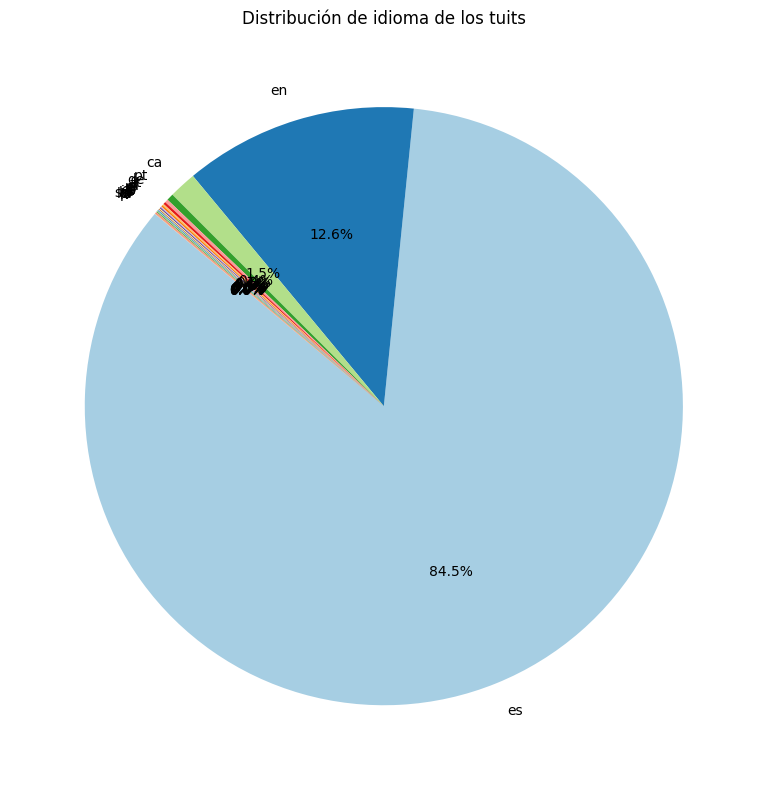

In [ ]:
import matplotlib.pyplot as plt

# Conteo de idiomas
language_counts = tuits_unicos['tweet_language'].value_counts()

# Pie chart
plt.figure(figsize=(8,8))
plt.pie(
    language_counts,
    labels=language_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors
)
plt.title("Distribución de idioma de los tuits")
plt.tight_layout()
plt.show()



### ¿Cómo son las notas de la muestra?

Creación de las notas- eje temporal:

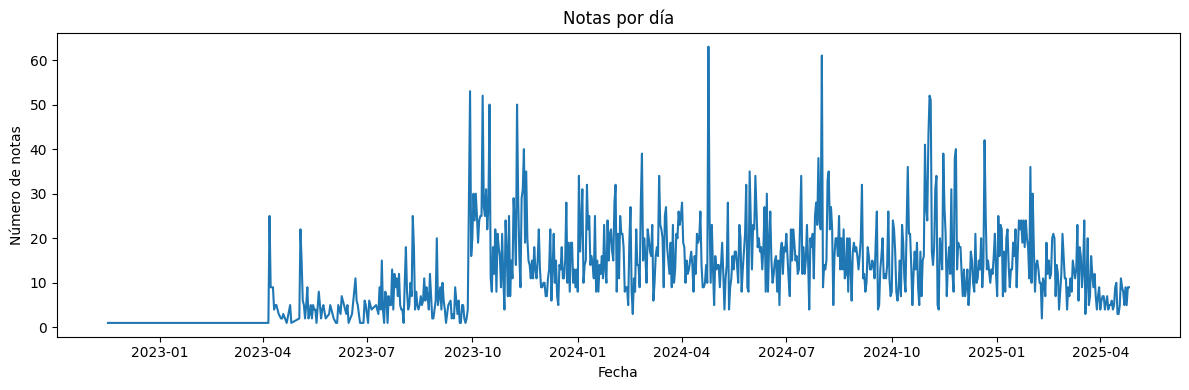

In [ ]:
import matplotlib.pyplot as plt

# Agrupar por fecha de creación y contar
notas_por_dia = tuits_notas_unicas['noteCreatedAt'].dt.date.value_counts().sort_index()

# Graficar
plt.figure(figsize=(12, 4))
notas_por_dia.plot(kind='line', title="Notas por día")
plt.xlabel("Fecha")
plt.ylabel("Número de notas")
plt.tight_layout()
plt.show()


In [ ]:
# Variables categóricas
print("\nVariables categóricas:")
for col in tuits_notas_unicas.select_dtypes(include='category').columns:
    print(f"\n {col}")
    print(tuits_notas_unicas[col].value_counts(dropna=False))

# Variables de texto
print("\nVariables de texto (object):")
for col in tuits_notas_unicas.select_dtypes(include='object').columns:
    print(f"\n{col}")
    print(f"→ Número de valores únicos: {tuits_notas_unicas[col].nunique()}")



Variables categóricas:

 classification
classification
MISINFORMED_OR_POTENTIALLY_MISLEADING    6903
NOT_MISLEADING                           3334
Name: count, dtype: int64

 currentStatus
currentStatus
NEEDS_MORE_RATINGS             9116
CURRENTLY_RATED_HELPFUL         697
CURRENTLY_RATED_NOT_HELPFUL     424
Name: count, dtype: int64

 firstNonNMRStatus
firstNonNMRStatus
NaN                            8317
CURRENTLY_RATED_HELPFUL        1117
CURRENTLY_RATED_NOT_HELPFUL     803
Name: count, dtype: int64

 mostRecentNonNMRStatus
mostRecentNonNMRStatus
NaN                            8317
CURRENTLY_RATED_HELPFUL        1117
CURRENTLY_RATED_NOT_HELPFUL     803
Name: count, dtype: int64

 lockedStatus
lockedStatus
NEEDS_MORE_RATINGS             5968
NaN                            3537
CURRENTLY_RATED_HELPFUL         432
CURRENTLY_RATED_NOT_HELPFUL     300
Name: count, dtype: int64

 helpfulnessLevel
helpfulnessLevel
HELPFUL             5848
NOT_HELPFUL         3947
SOMEWHAT_HELPFUL     442

/tmp/ipython-input-164-169602534.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=clas_percent.values, y=clas_percent.index, palette='Blues_d')


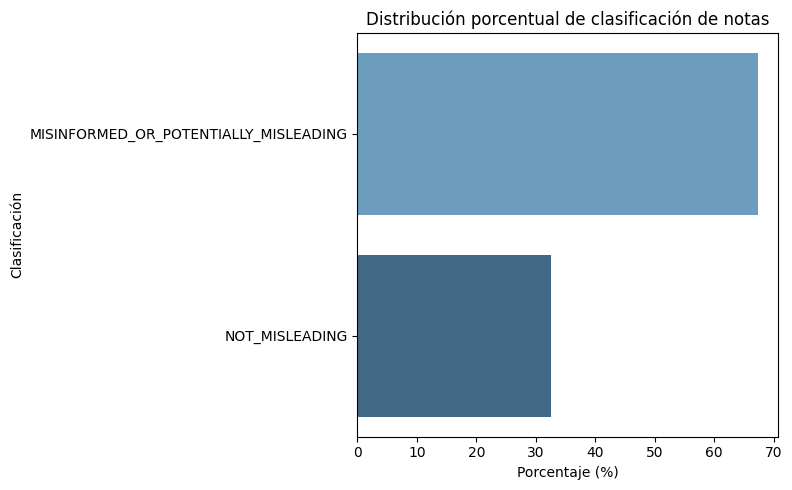

In [ ]:
columna_clasificacion = 'classification'
# Conteo de valores
clas_counts = tuits_notas_unicas[columna_clasificacion].value_counts(dropna=False).sort_values(ascending=False)


clas_percent = clas_counts / clas_counts.sum() * 100

plt.figure(figsize=(8, 5))
sns.barplot(x=clas_percent.values, y=clas_percent.index, palette='Blues_d')
plt.title("Distribución porcentual de clasificación de notas")
plt.xlabel("Porcentaje (%)")
plt.ylabel("Clasificación")
plt.tight_layout()
plt.show()


/tmp/ipython-input-165-3925041898.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=misleading_percentages.index, x=misleading_percentages.values, palette="Reds_r")


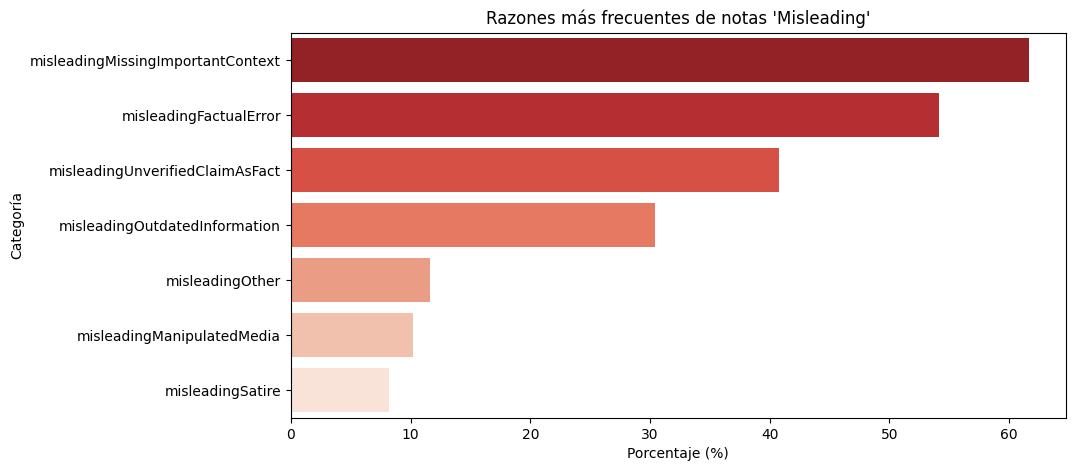

/tmp/ipython-input-165-3925041898.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=not_misleading_percentages.index, x=not_misleading_percentages.values, palette="Greens_r")


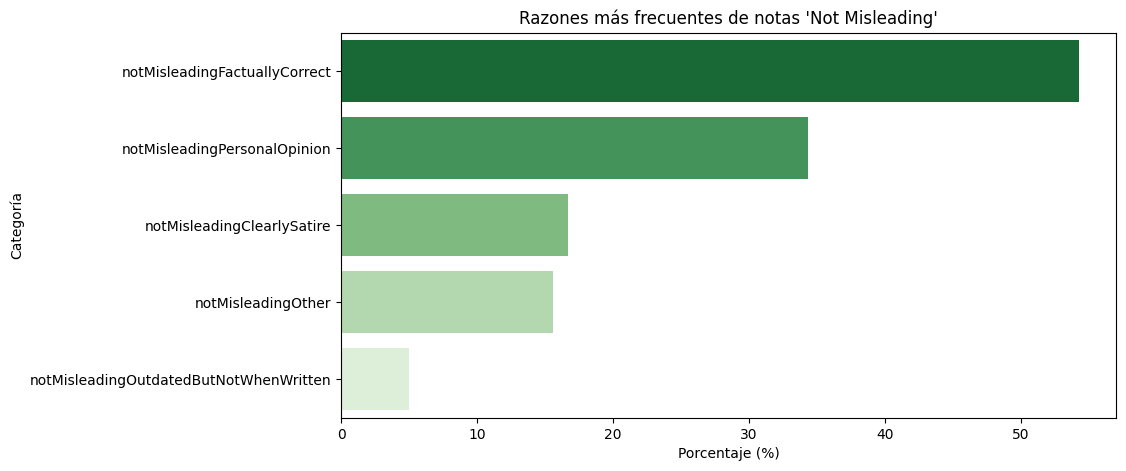

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Identificar columnas relevantes
misleading_cols = [col for col in tuits_notas_unicas.columns if 'misleading' in col.lower() and col.startswith('misleading')]
not_misleading_cols = [col for col in tuits_notas_unicas.columns if 'notMisleading' in col]

# Crear subconjuntos
df_misleading = tuits_notas_unicas[tuits_notas_unicas[misleading_cols].any(axis=1)]
df_not_misleading = tuits_notas_unicas[tuits_notas_unicas[not_misleading_cols].any(axis=1)]

# Calcular porcentajes
misleading_percentages = df_misleading[misleading_cols].mean().sort_values(ascending=False) * 100
not_misleading_percentages = df_not_misleading[not_misleading_cols].mean().sort_values(ascending=False) * 100

# Graficar razones de notas misleading
plt.figure(figsize=(10, 5))
sns.barplot(y=misleading_percentages.index, x=misleading_percentages.values, palette="Reds_r")
plt.title("Razones más frecuentes de notas 'Misleading'")
plt.xlabel("Porcentaje (%)")
plt.ylabel("Categoría")
plt.show()

# Graficar razones de notas not misleading
plt.figure(figsize=(10, 5))
sns.barplot(y=not_misleading_percentages.index, x=not_misleading_percentages.values, palette="Greens_r")
plt.title("Razones más frecuentes de notas 'Not Misleading'")
plt.xlabel("Porcentaje (%)")
plt.ylabel("Categoría")
plt.show()


### ¿Cómo son las evaluaciones de la muestra?

Proporción de votos

Distribución de ratings (votos):
helpfulnessLevel
HELPFUL             502566
NOT_HELPFUL         328656
SOMEWHAT_HELPFUL     28421
Name: count, dtype: int64

Porcentaje:
helpfulnessLevel
HELPFUL             58.46
NOT_HELPFUL         38.23
SOMEWHAT_HELPFUL     3.31
Name: count, dtype: float64


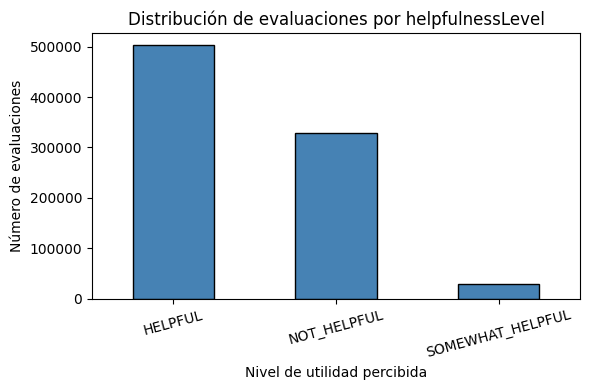

In [ ]:
import matplotlib.pyplot as plt

# proporción de ratings por tipo
rating_counts = final_df['helpfulnessLevel'].value_counts(dropna=False)
rating_perc = rating_counts / rating_counts.sum() * 100

print("Distribución de ratings (votos):")
print(rating_counts)
print("\nPorcentaje:")
print(rating_perc.round(2))

# visualización
plt.figure(figsize=(6,4))
rating_counts.plot(kind='bar', color='steelblue', edgecolor='black')
plt.ylabel("Número de evaluaciones")
plt.xlabel("Nivel de utilidad percibida")
plt.title("Distribución de evaluaciones por helpfulnessLevel")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


Evolución temporal de votos

/tmp/ipython-input-167-3621742041.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  final_df.groupby([pd.Grouper(key='ratingCreatedAt', freq='M'), 'helpfulnessLevel'])
/tmp/ipython-input-167-3621742041.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  final_df.groupby([pd.Grouper(key='ratingCreatedAt', freq='M'), 'helpfulnessLevel'])


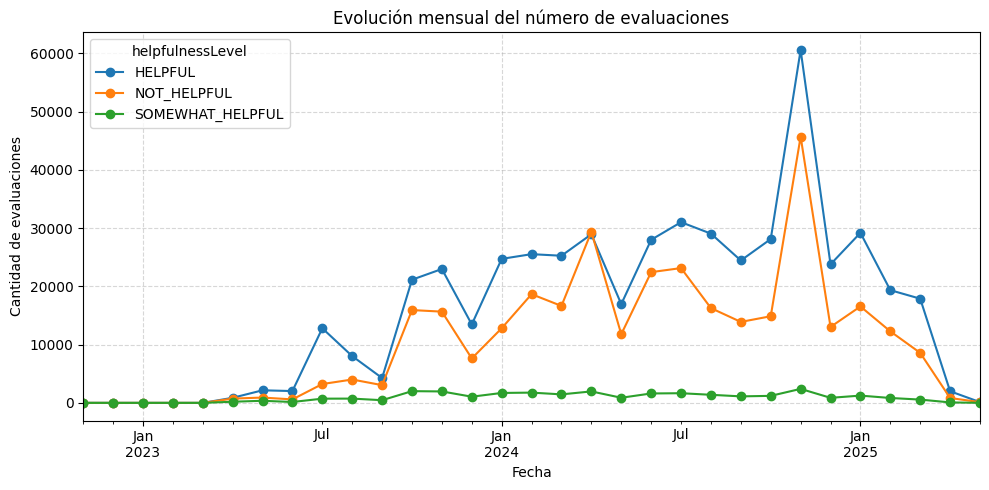

In [ ]:
# aseguramos la fecha de rating en datetime
final_df['ratingCreatedAt'] = pd.to_datetime(final_df['ratingCreatedAt'], errors='coerce')

# agrupar por mes y tipo
ratings_by_month = (
    final_df.groupby([pd.Grouper(key='ratingCreatedAt', freq='M'), 'helpfulnessLevel'])
    .size()
    .unstack(fill_value=0)
)

ratings_by_month.plot(kind='line', marker='o', figsize=(10,5))
plt.title("Evolución mensual del número de evaluaciones")
plt.ylabel("Cantidad de evaluaciones")
plt.xlabel("Fecha")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


Propuesta: se podría eliminar el Somewhat Helpful para que haya más polarización en opiniones

Participantes:

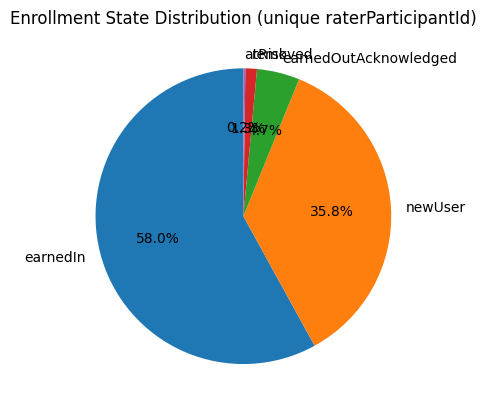

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Para no duplicar participantes, tomamos el primer enrollmentState de cada participante
unique_participants = final_df.groupby('raterParticipantId')['enrollmentState'].first()

# Contar los enrollmentState únicos por participante
counts = unique_participants.value_counts()

# Graficar
plt.figure()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Enrollment State Distribution (unique raterParticipantId)")
plt.show()


#Análisis texto nota/tweet

Limpiamos las columnas de texto eliminando preposiciones

In [ ]:
import re

def clean_text(text):
    stop_words = set([
        'de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para',
        'con', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o',
        'este', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también',
        'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos',
        'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto',
        'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'NNN', 'NN','está', 'son', 'fue','nnn'
    ])
    if pd.isna(text):
        return ""
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'[^A-Za-zÁÉÍÓÚÑáéíóúñ\s]', '', text)
    text = text.lower()
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
    return " ".join(tokens)

# Generar columnas nuevas
tuits_notas_unicas["clean_note_stop"] = tuits_notas_unicas["summary"].apply(clean_text)
tuits_notas_unicas["clean_tweet_stop"] = tuits_notas_unicas["tweet_clean"].apply(clean_text)


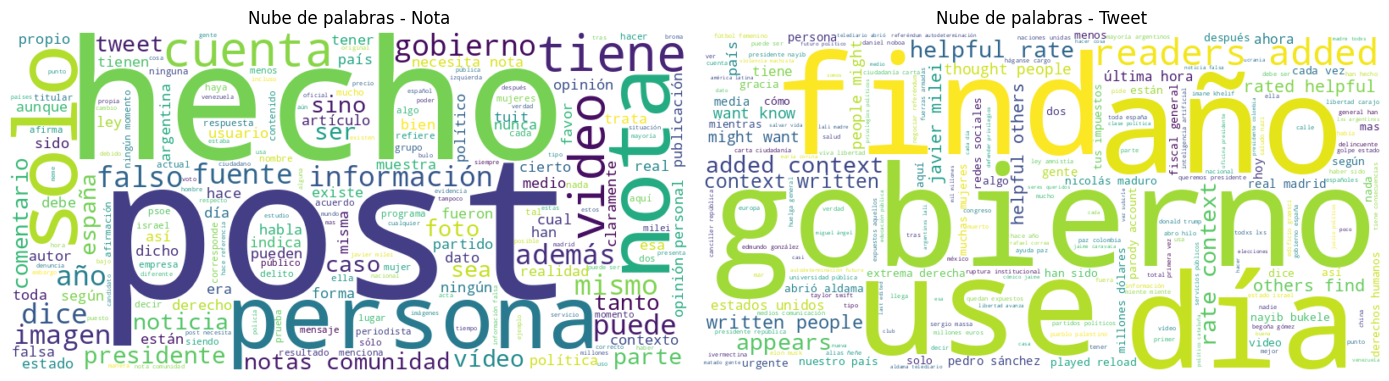

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generar nubes
text_note = " ".join(tuits_notas_unicas["clean_note_stop"].dropna())
text_tweet = " ".join(tuits_notas_unicas["clean_tweet_stop"].dropna())
wordcloud_note = WordCloud(width=800, height=400, background_color='white').generate(text_note)
wordcloud_tweet = WordCloud(width=800, height=400, background_color='white').generate(text_tweet)

# Mostrar
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_note, interpolation='bilinear')
plt.axis("off")
plt.title("Nube de palabras - Nota")

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_tweet, interpolation='bilinear')
plt.axis("off")
plt.title("Nube de palabras - Tweet")

plt.tight_layout()
plt.show()




---



# Análisis bivariante

Variables categóricas (gráficos + test chi-cuadrado)

### sentimiento

/tmp/ipython-input-171-2991630121.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=tuits_notas_unicas, x="currentStatus", y="note_sentiment", palette="Spectral")


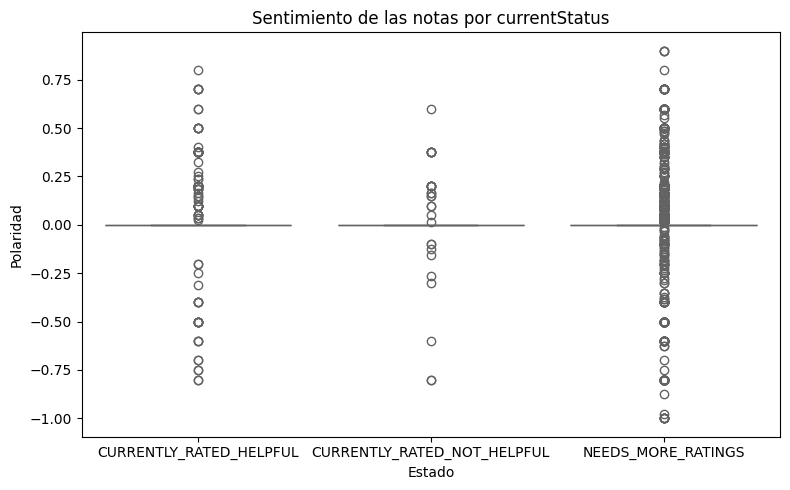

In [ ]:
from textblob import TextBlob

def obtener_polaridad(text):
    if pd.isna(text) or text.strip() == "":
        return 0
    return TextBlob(text).sentiment.polarity

tuits_notas_unicas['note_sentiment'] = tuits_notas_unicas['note_clean'].apply(obtener_polaridad)

plt.figure(figsize=(8,5))
sns.boxplot(data=tuits_notas_unicas, x="currentStatus", y="note_sentiment", palette="Spectral")
plt.title("Sentimiento de las notas por currentStatus")
plt.ylabel("Polaridad")
plt.xlabel("Estado")
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from scipy import stats

# Supongamos que tu dataframe se llama df y tiene columnas:
# 'currentStatus' y 'polarity'

# Comprobamos que no hay nulos
df_clean = tuits_notas_unicas.dropna(subset=['currentStatus', 'note_sentiment'])

# Vemos la media de polaridad por grupo
medias = df_clean.groupby('currentStatus')['note_sentiment'].mean()
print("Media de polaridad por estado:")
print(medias)

# Extraemos grupos
helpful = df_clean[df_clean['currentStatus'] == 'CURRENTLY_RATED_HELPFUL']['note_sentiment']
not_helpful = df_clean[df_clean['currentStatus'] == 'CURRENTLY_RATED_NOT_HELPFUL']['note_sentiment']
nmr = df_clean[df_clean['currentStatus'] == 'NEEDS_MORE_RATINGS']['note_sentiment']

# ANOVA
f_stat, p_value = stats.f_oneway(helpful, not_helpful, nmr)
print(f"ANOVA F={f_stat:.4f}, p-value={p_value:.4f}")

# Interpretación
if p_value < 0.05:
    print("Existen diferencias estadísticamente significativas entre los grupos de polaridad.")
else:
    print("No hay diferencias estadísticamente significativas entre los grupos de polaridad.")


/tmp/ipython-input-172-3653457138.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medias = df_clean.groupby('currentStatus')['note_sentiment'].mean()


Media de polaridad por estado:
currentStatus
CURRENTLY_RATED_HELPFUL        0.020132
CURRENTLY_RATED_NOT_HELPFUL    0.004488
NEEDS_MORE_RATINGS             0.010956
Name: note_sentiment, dtype: float64
ANOVA F=2.2097, p-value=0.1098
No hay diferencias estadísticamente significativas entre los grupos de polaridad.


engagement (likes, rt, views..) por current status

/tmp/ipython-input-173-3396041222.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=tuits_notas_unicas, x="currentStatus", y=var, palette="Set2", showfliers=False)


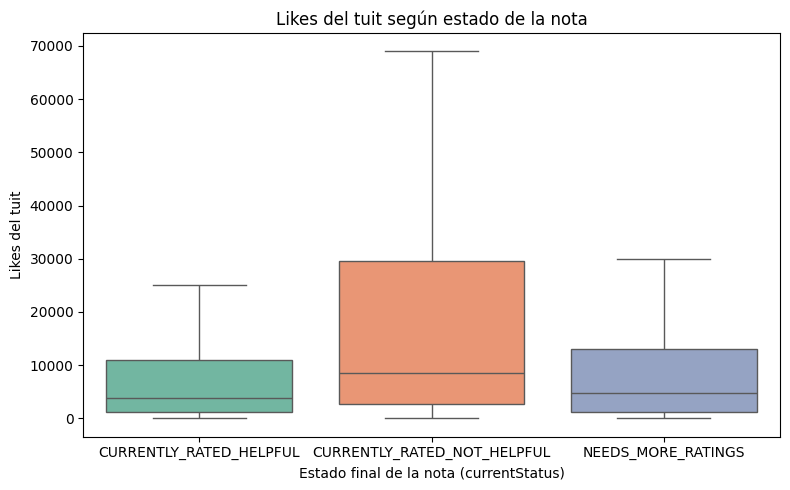

/tmp/ipython-input-173-3396041222.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=tuits_notas_unicas, x="currentStatus", y=var, palette="Set2", showfliers=False)


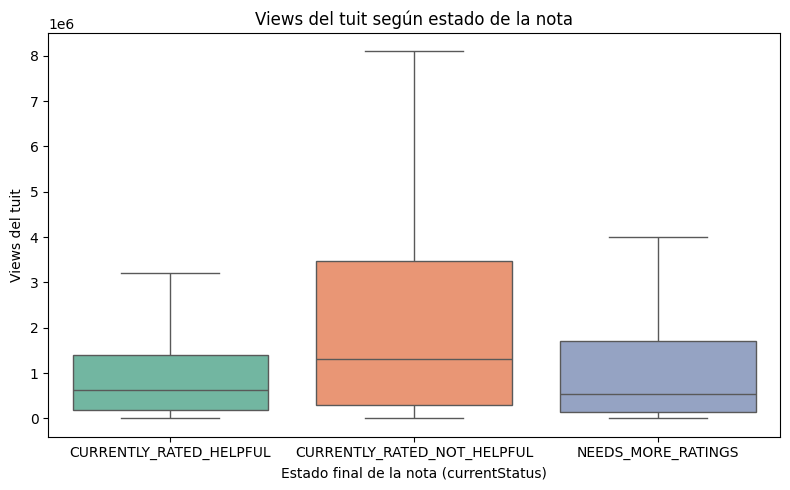

/tmp/ipython-input-173-3396041222.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=tuits_notas_unicas, x="currentStatus", y=var, palette="Set2", showfliers=False)


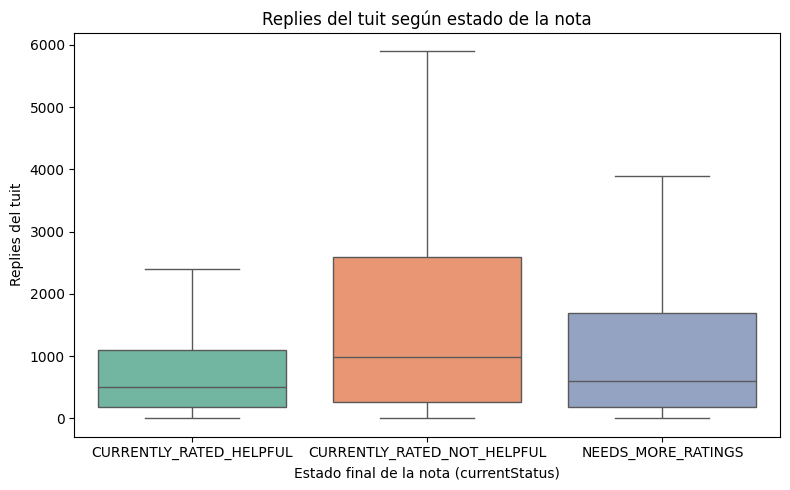

/tmp/ipython-input-173-3396041222.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=tuits_notas_unicas, x="currentStatus", y=var, palette="Set2", showfliers=False)


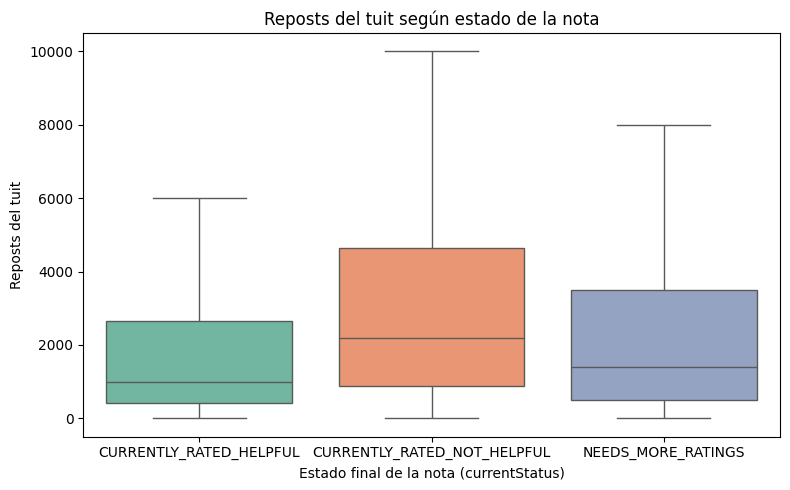

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

engagement_vars = ["likes", "views", "replies", "reposts"]

for var in engagement_vars:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=tuits_notas_unicas, x="currentStatus", y=var, palette="Set2", showfliers=False)
    plt.title(f"{var.capitalize()} del tuit según estado de la nota")
    plt.xlabel("Estado final de la nota (currentStatus)")
    plt.ylabel(f"{var.capitalize()} del tuit")
    plt.tight_layout()
    plt.show()


## Estructura nota

/tmp/ipython-input-175-1335396188.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=tuits_notas_unicas, x="currentStatus", y="num_misleading_tags", palette="coolwarm")


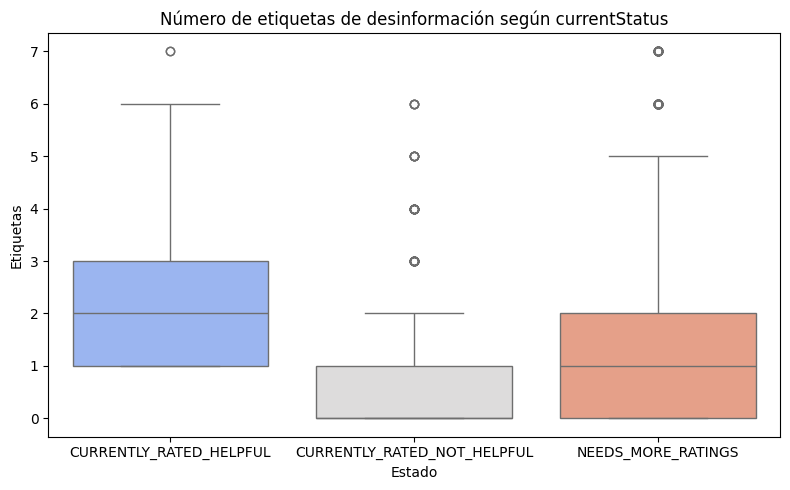

In [ ]:
# sumamos las columnas misleading
misleading_cols = [col for col in tuits_notas_unicas.columns if col.startswith("misleading")]
tuits_notas_unicas['num_misleading_tags'] = tuits_notas_unicas[misleading_cols].sum(axis=1)

plt.figure(figsize=(8,5))
sns.boxplot(data=tuits_notas_unicas, x="currentStatus", y="num_misleading_tags", palette="coolwarm")
plt.title("Número de etiquetas de desinformación según currentStatus")
plt.ylabel("Etiquetas")
plt.xlabel("Estado")
plt.tight_layout()
plt.show()



In [ ]:
from scipy import stats

# Limpieza previa: eliminar posibles nulos
df_clean = tuits_notas_unicas.dropna(subset=['currentStatus', 'num_misleading_tags'])

# Separar grupos
helpful = df_clean[df_clean['currentStatus'] == 'CURRENTLY_RATED_HELPFUL']['num_misleading_tags']
not_helpful = df_clean[df_clean['currentStatus'] == 'CURRENTLY_RATED_NOT_HELPFUL']['num_misleading_tags']
nmr = df_clean[df_clean['currentStatus'] == 'NEEDS_MORE_RATINGS']['num_misleading_tags']

# ANOVA
f_stat, p_value = stats.f_oneway(helpful, not_helpful, nmr)

print(f"ANOVA F={f_stat:.4f}, p-value={p_value:.4f}")

if p_value < 0.05:
    print("Hay diferencias estadísticamente significativas entre grupos.")
else:
    print("No se detectan diferencias estadísticamente significativas entre grupos.")


ANOVA F=152.1555, p-value=0.0000
Hay diferencias estadísticamente significativas entre grupos.


## Correlación numéricas

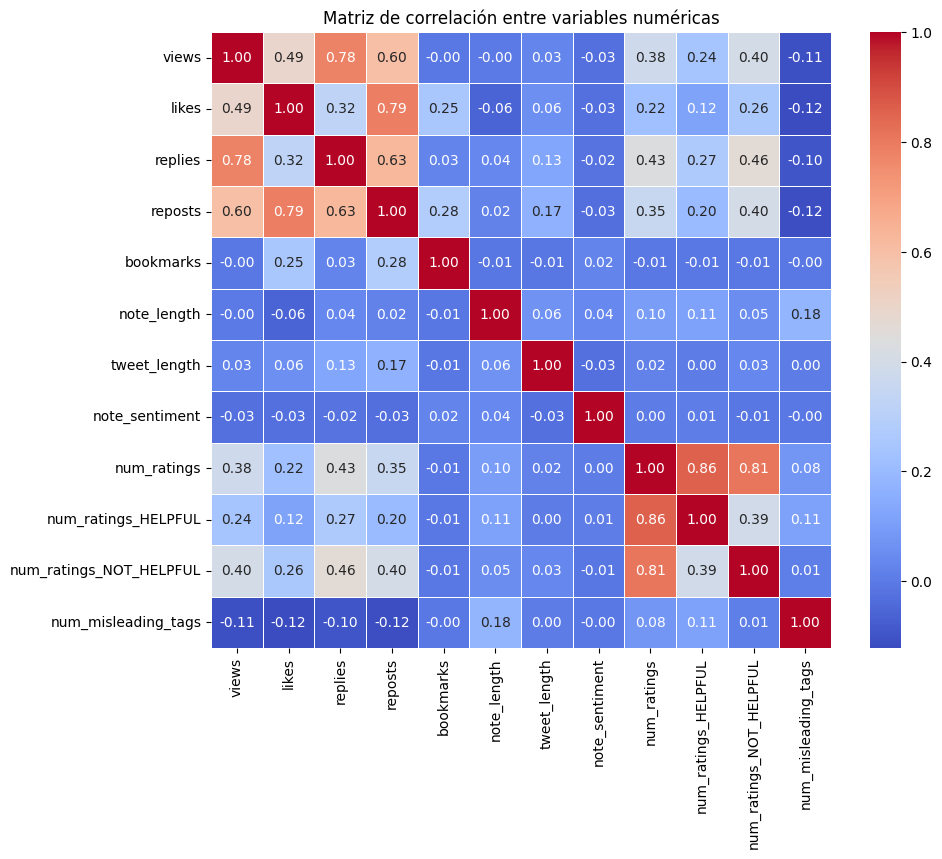

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selección de columnas numéricas de interés
cols_corr = [
    "views", "likes", "replies", "reposts", "bookmarks",
    "note_length", "tweet_length", "note_sentiment",
    "num_ratings", "num_ratings_HELPFUL", "num_ratings_NOT_HELPFUL",
    "num_misleading_tags"
]

# Filtrar columnas y eliminar nulos para evitar problemas
df_corr = tuits_notas_unicas[cols_corr].dropna()

# Calcular matriz de correlación
corr_matrix = df_corr.corr()

# Visualizar como heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de correlación entre variables numéricas")
plt.show()


## Factores lingüísticos de las notas

### Longitud media de notas por currentStatus

/tmp/ipython-input-177-2957075919.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=tuits_notas_unicas, x="currentStatus", y="note_length", palette="pastel")


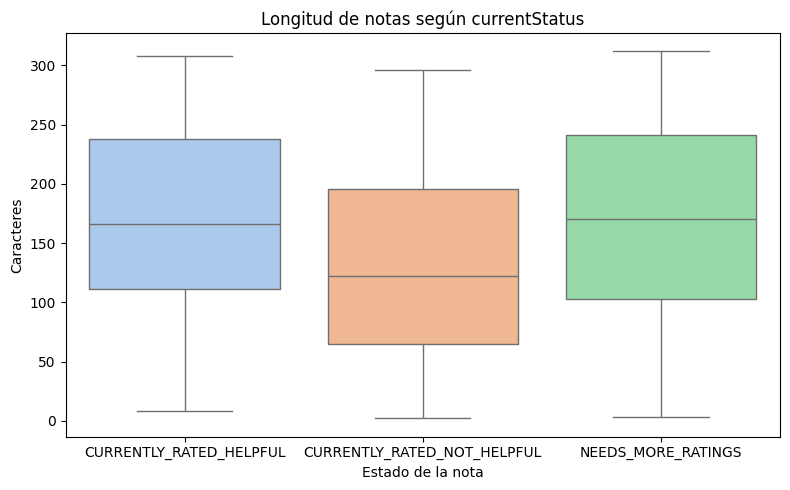

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.boxplot(data=tuits_notas_unicas, x="currentStatus", y="note_length", palette="pastel")
plt.title("Longitud de notas según currentStatus")
plt.ylabel("Caracteres")
plt.xlabel("Estado de la nota")
plt.tight_layout()
plt.show()


In [ ]:
from scipy import stats

# Limpiamos posibles nulos
df_clean = tuits_notas_unicas.dropna(subset=['currentStatus', 'note_length'])

# Separar grupos
helpful = df_clean[df_clean['currentStatus'] == 'CURRENTLY_RATED_HELPFUL']['note_length']
not_helpful = df_clean[df_clean['currentStatus'] == 'CURRENTLY_RATED_NOT_HELPFUL']['note_length']
nmr = df_clean[df_clean['currentStatus'] == 'NEEDS_MORE_RATINGS']['note_length']

# ANOVA
f_stat, p_value = stats.f_oneway(helpful, not_helpful, nmr)

print(f"ANOVA F={f_stat:.4f}, p-value={p_value:.4f}")

if p_value < 0.05:
    print("Hay diferencias estadísticamente significativas en la longitud de las notas entre grupos.")
else:
    print("No se detectan diferencias estadísticamente significativas en la longitud de las notas entre grupos.")


ANOVA F=44.1466, p-value=0.0000
Hay diferencias estadísticamente significativas en la longitud de las notas entre grupos.


### Notas con trustworthySources

/tmp/ipython-input-178-2362381990.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  trust_counts = tuits_notas_unicas.groupby('currentStatus')['trustworthySources'].mean() * 100


currentStatus
CURRENTLY_RATED_HELPFUL        97.70
CURRENTLY_RATED_NOT_HELPFUL    54.95
NEEDS_MORE_RATINGS             74.42
Name: trustworthySources, dtype: float64


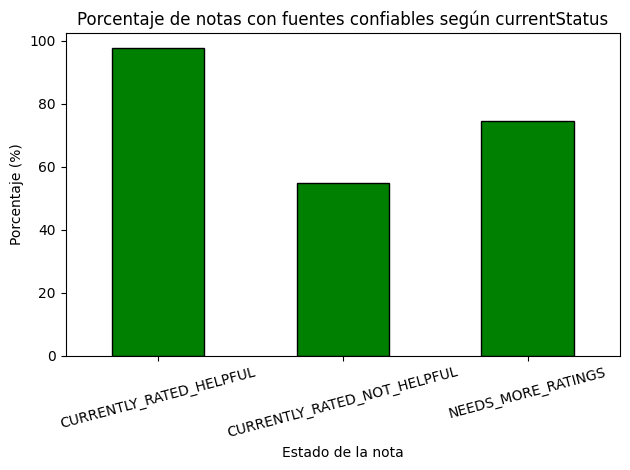

In [ ]:
# Calcula proporciones y luego pasa a porcentaje
trust_counts = tuits_notas_unicas.groupby('currentStatus')['trustworthySources'].mean() * 100

print(trust_counts.round(2))  # redondea a 2 decimales para mayor claridad

# También podemos graficarlo en porcentaje
trust_counts.plot(
    kind='bar',
    color='green',
    edgecolor='black'
)

plt.title("Porcentaje de notas con fuentes confiables según currentStatus")
plt.ylabel("Porcentaje (%)")
plt.xlabel("Estado de la nota")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


### Palabras clave de veracidad

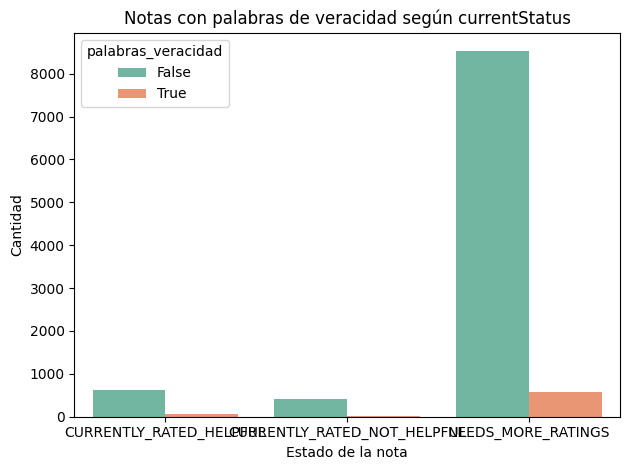

In [ ]:
# contar notas que contengan palabras de veracidad
keywords = ["verdadero","falso","engañoso","incorrecto","mentira"]
tuits_notas_unicas['palabras_veracidad'] = tuits_notas_unicas['note_clean'].str.contains('|'.join(keywords), case=False, na=False)

sns.countplot(
    data=tuits_notas_unicas,
    x="currentStatus",
    hue="palabras_veracidad",
    palette="Set2"
)
plt.title("Notas con palabras de veracidad según currentStatus")
plt.ylabel("Cantidad")
plt.xlabel("Estado de la nota")
plt.tight_layout()
plt.show()

## Distribución de CurrentStatus según la clasificación del tweet

/tmp/ipython-input-180-1031395475.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conteo_status = tuits_notas_unicas.groupby(['classification', 'currentStatus']).size().reset_index(name='count')


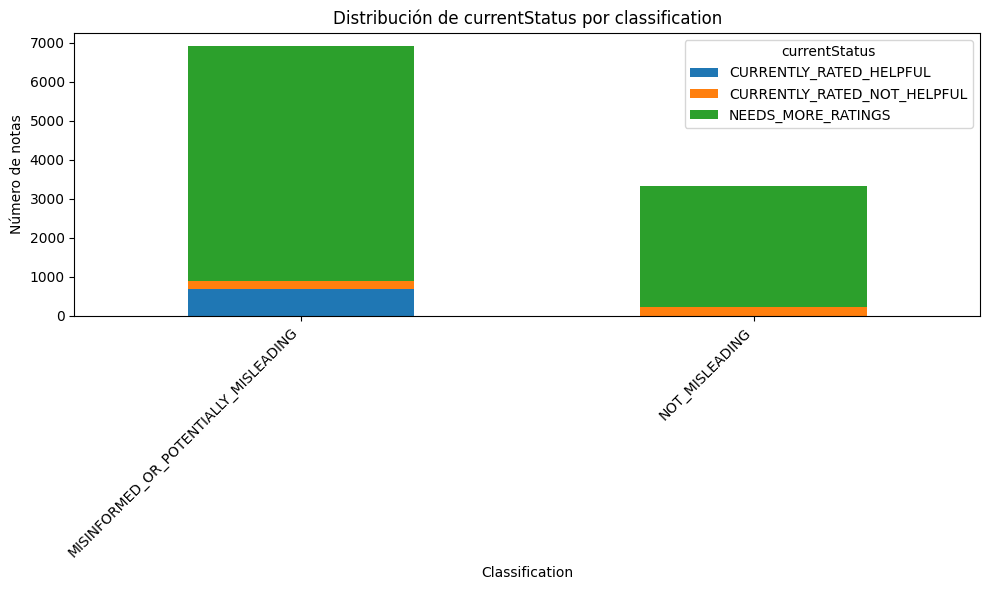

currentStatus,Total de notas,CURRENTLY_RATED_HELPFUL,CURRENTLY_RATED_NOT_HELPFUL,NEEDS_MORE_RATINGS,CURRENTLY_RATED_HELPFUL (%),CURRENTLY_RATED_NOT_HELPFUL (%),NEEDS_MORE_RATINGS (%)
Clasificación,,,,,,,
MISINFORMED_OR_POTENTIALLY_MISLEADING,6903,697,191,6015,10.10,2.77,87.14
NOT_MISLEADING,3334,0,233,3101,0.00,6.99,93.01


In [ ]:
import matplotlib.pyplot as plt

# 1. Agrupar y contar
conteo_status = tuits_notas_unicas.groupby(['classification', 'currentStatus']).size().reset_index(name='count')

# 2. Pivot para tabla de conteos
pivot_table = conteo_status.pivot(index='classification', columns='currentStatus', values='count').fillna(0)

# 3. Gráfico de barras apiladas con valores absolutos
pivot_table.plot(kind='bar', stacked=True, figsize=(10,6))

plt.xlabel('Classification')
plt.ylabel('Número de notas')
plt.title('Distribución de currentStatus por classification')
plt.xticks(rotation=45, ha='right')
plt.legend(title='currentStatus')
plt.tight_layout()
plt.show()


# 2. Pivot de conteos
pivot_table = conteo_status.pivot(index='classification', columns='currentStatus', values='count').fillna(0).astype(int)

# 3. Totales por classification
totales = pivot_table.sum(axis=1)

# 4. Porcentajes
pivot_percent = pivot_table.div(totales, axis=0) * 100
pivot_percent = pivot_percent.round(2)

# 5. Combinar en una tabla
tabla_final = pivot_table.copy()
for col in pivot_percent.columns:
    tabla_final[f"{col} (%)"] = pivot_percent[col]

# 6. Añadir columna total
tabla_final.insert(0, "Total de notas", totales.astype(int))

# 7. Renombrar el índice para claridad
tabla_final.index.name = "Clasificación"

# 8. Mostrar con estilo
tabla_bonita = tabla_final.style\
    .format(na_rep="0", precision=2)\
    .set_caption("Distribución de currentStatus por clasificación (valores absolutos y porcentajes)")\
    .background_gradient(axis=None, cmap="Blues")\
    .set_table_styles(
        [
            {"selector": "th", "props": [("font-size", "12pt"), ("text-align", "center")]},
            {"selector": "td", "props": [("font-size", "11pt")]}
        ]
    )

tabla_bonita

# Análisis NMR

In [ ]:
#Comprobación de columna LockedStatus
mask_diff = tuits_notas_unicas[
    (tuits_notas_unicas['currentStatus'].notna()) &
    (tuits_notas_unicas['lockedStatus'].notna()) &
    (tuits_notas_unicas['currentStatus'] != tuits_notas_unicas['lockedStatus'])
]

# ver el resultado
print(mask_diff[['noteId', 'currentStatus', 'lockedStatus']].head())
print(f"\nTotal de casos con currentStatus diferente a lockedStatus: {len(mask_diff)}")

Empty DataFrame
Columns: [noteId, currentStatus, lockedStatus]
Index: []

Total de casos con currentStatus diferente a lockedStatus: 0


In [ ]:
nmr_misleading = tuits_notas_unicas[
    (tuits_notas_unicas['currentStatus'] == 'NEEDS_MORE_RATINGS') &
    (tuits_notas_unicas['classification'] == 'MISINFORMED_OR_POTENTIALLY_MISLEADING')
].copy()
print(f"Notas NMR con clasificación MISLEADING: {nmr_misleading.shape[0]}")
# 1️⃣ Notas con mostRecentNonNMRStatus nulo
notas_siempre_nmr = nmr_misleading[
    nmr_misleading['mostRecentNonNMRStatus'].isna()
]
print(f"Notas MISLEADING que NUNCA salieron de NMR (mostRecentNonNMRStatus nulo): {notas_siempre_nmr.shape[0]}")

# 2️⃣ Notas con mostRecentNonNMRStatus no nulo
notas_salieron = nmr_misleading[
    nmr_misleading['mostRecentNonNMRStatus'].notna()
]
print(f"Notas MISLEADING que alguna vez salieron de NMR (mostRecentNonNMRStatus no nulo): {notas_salieron.shape[0]}")

# distribución del currentStatus en esas notas
print("\nDistribución currentStatus para notas MISLEADING que alguna vez salieron de NMR:")
print(notas_salieron['currentStatus'].value_counts(dropna=False))

# Ver ejemplos
print("\nEjemplo de notas MISLEADING con mostRecentNonNMRStatus NO nulo:")
display(notas_salieron[['noteId', 'mostRecentNonNMRStatus', 'currentStatus']].sample(5))

Notas NMR con clasificación MISLEADING: 6015
Notas MISLEADING que NUNCA salieron de NMR (mostRecentNonNMRStatus nulo): 5394
Notas MISLEADING que alguna vez salieron de NMR (mostRecentNonNMRStatus no nulo): 621

Distribución currentStatus para notas MISLEADING que alguna vez salieron de NMR:
currentStatus
NEEDS_MORE_RATINGS             621
CURRENTLY_RATED_HELPFUL          0
CURRENTLY_RATED_NOT_HELPFUL      0
Name: count, dtype: int64

Ejemplo de notas MISLEADING con mostRecentNonNMRStatus NO nulo:


,noteId,mostRecentNonNMRStatus,currentStatus
5494,1713944149139862011,CURRENTLY_RATED_NOT_HELPFUL,NEEDS_MORE_RATINGS
5411,1802111844397588614,CURRENTLY_RATED_NOT_HELPFUL,NEEDS_MORE_RATINGS
1281,1844793881503948927,CURRENTLY_RATED_HELPFUL,NEEDS_MORE_RATINGS
8831,1745815929500340728,CURRENTLY_RATED_NOT_HELPFUL,NEEDS_MORE_RATINGS
1773,1766867856795246906,CURRENTLY_RATED_HELPFUL,NEEDS_MORE_RATINGS


In [ ]:
# ======================================
# CONFIGURACIÓN Y FILTROS INICIALES
# ======================================

# Filtrar solo notas con currentStatus == NMR y clasificación MISLEADING
nmr_misleading = tuits_notas_unicas[
    (tuits_notas_unicas['currentStatus'] == 'NEEDS_MORE_RATINGS') &
    (tuits_notas_unicas['classification'] == 'MISINFORMED_OR_POTENTIALLY_MISLEADING')
].copy()

print(f"Total de notas NMR clasificadas como MISLEADING: {nmr_misleading.shape[0]}")

# ======================================
# ANÁLISIS DE RATINGS
# ======================================

# notas con más de 5 ratings
nmr_misleading['num_ratings'] = nmr_misleading['num_ratings'].fillna(0)
notas_mas_5ratings = nmr_misleading[nmr_misleading['num_ratings'] >= 5]
print(f"Notas con >=5 ratings: {notas_mas_5ratings.shape[0]} ({notas_mas_5ratings.shape[0]/nmr_misleading.shape[0]*100:.2f}%)")

# calcular proporción de votos HELPFUL
nmr_misleading['helpful_ratio'] = nmr_misleading['num_ratings_HELPFUL'] / nmr_misleading['num_ratings']
nmr_misleading['helpful_ratio'] = nmr_misleading['helpful_ratio'].fillna(0)

# notas con >80% votos HELPFUL
nmr_high_helpful = nmr_misleading[
    (nmr_misleading['helpful_ratio'] >= 0.8) &
    (nmr_misleading['num_ratings'] >= 5)
]
print(f"Notas con >80% HELPFUL y >=5 ratings: {nmr_high_helpful.shape[0]} ({nmr_high_helpful.shape[0]/nmr_misleading.shape[0]*100:.2f}%)")

# ======================================
# CARACTERÍSTICAS GENERALES
# ======================================

print("\n✅ Características de TODAS las notas NMR-MISLEADING:")
print("Longitud de las notas:")
print(nmr_misleading['note_length'].describe())

if "note_sentiment" in nmr_misleading.columns:
    print("\nSentimiento de las notas:")
    print(nmr_misleading['note_sentiment'].describe())
else:
    print("\nNo se ha calculado note_sentiment aún")

print("\nProporción de notas que citan fuentes confiables:")
print(nmr_misleading['trustworthySources'].mean())

# ======================================
# CARACTERÍSTICAS DE LAS “atascadas” (>80% HELPFUL)
# ======================================

print("\n✅ Características de las notas NMR con >80% HELPFUL y >=5 ratings:")
print("Longitud de la nota:")
print(nmr_high_helpful['note_length'].describe())

if "note_sentiment" in nmr_high_helpful.columns:
    print("\nSentimiento de la nota:")
    print(nmr_high_helpful['note_sentiment'].describe())
else:
    print("\nNo se ha calculado note_sentiment aún")

print("\nProporción de notas que citan fuentes confiables:")
print(nmr_high_helpful['trustworthySources'].mean())


Total de notas NMR clasificadas como MISLEADING: 6015
Notas con >=5 ratings: 5163 (85.84%)
Notas con >80% HELPFUL y >=5 ratings: 1148 (19.09%)

✅ Características de TODAS las notas NMR-MISLEADING:
Longitud de las notas:
count    6015.000000
mean      177.391521
std        74.793238
min         3.000000
25%       116.000000
50%       183.000000
75%       249.500000
max       312.000000
Name: note_length, dtype: float64

Sentimiento de las notas:
count    6015.000000
mean        0.012673
std         0.137264
min        -1.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.900000
Name: note_sentiment, dtype: float64

Proporción de notas que citan fuentes confiables:
0.9258520365752286

✅ Características de las notas NMR con >80% HELPFUL y >=5 ratings:
Longitud de la nota:
count    1148.000000
mean      182.235192
std        70.550535
min        22.000000
25%       122.000000
50%       190.000000
75%       246.250000
max       312.000000
Name: note_length, 

Cambio de estado:

Cuando una nota alcanza un primer estado distinto de NMR (es decir, firstNonNMRStatus), significa que había suficiente evidencia en las evaluaciones iniciales para marcarla como útil o no útil.

Sin embargo, posteriormente pueden llegar más evaluaciones que cambien la estabilidad del consenso (por ejemplo aparecen votos contradictorios), haciendo que la nota pierda la “confianza” del algoritmo y vuelva temporalmente a NEEDS_MORE_RATINGS para recoger más ratings antes de volver a decidirse definitivamente.

In [ ]:
# Notas MISLEADING que alguna vez salieron de NMR
# Añadir columnas auxiliares en string
nmr_misleading["mostRecentNonNMRStatus_str"] = nmr_misleading["mostRecentNonNMRStatus"].astype(str)
nmr_misleading["currentStatus_str"] = nmr_misleading["currentStatus"].astype(str)

# Filtrar aquellas que tuvieron un estado diferente en algún momento
cambiaron_estado_nmr_misleading = nmr_misleading[
    (nmr_misleading["mostRecentNonNMRStatus_str"] != "nan") &
    (nmr_misleading["mostRecentNonNMRStatus_str"] != nmr_misleading["currentStatus_str"])
].copy()

print(f"Notas MISLEADING actualmente en NMR que cambiaron de estado previamente: {cambiaron_estado_nmr_misleading.shape}")

# Mostrar ejemplo
display(cambiaron_estado_nmr_misleading[['noteId','mostRecentNonNMRStatus', 'currentStatus']].head(10))

# Conteos
print("\nDistribución de mostRecentNonNMRStatus en estas notas:")
print(cambiaron_estado_nmr_misleading['mostRecentNonNMRStatus'].value_counts())



Notas MISLEADING actualmente en NMR que cambiaron de estado previamente: (621, 77)


,noteId,mostRecentNonNMRStatus,currentStatus
34,1738288340925825293,CURRENTLY_RATED_NOT_HELPFUL,NEEDS_MORE_RATINGS
37,1799070417748951272,CURRENTLY_RATED_HELPFUL,NEEDS_MORE_RATINGS
38,1799003508345344063,CURRENTLY_RATED_HELPFUL,NEEDS_MORE_RATINGS
39,1798969111961321520,CURRENTLY_RATED_HELPFUL,NEEDS_MORE_RATINGS
44,1733191313867030540,CURRENTLY_RATED_HELPFUL,NEEDS_MORE_RATINGS
46,1733452118466371756,CURRENTLY_RATED_HELPFUL,NEEDS_MORE_RATINGS
69,1690434829152874801,CURRENTLY_RATED_NOT_HELPFUL,NEEDS_MORE_RATINGS
77,1894563141872128410,CURRENTLY_RATED_HELPFUL,NEEDS_MORE_RATINGS
88,1753410086536388657,CURRENTLY_RATED_HELPFUL,NEEDS_MORE_RATINGS
106,1861885896729207000,CURRENTLY_RATED_HELPFUL,NEEDS_MORE_RATINGS



Distribución de mostRecentNonNMRStatus en estas notas:
mostRecentNonNMRStatus
CURRENTLY_RATED_HELPFUL        420
CURRENTLY_RATED_NOT_HELPFUL    201
Name: count, dtype: int64


In [ ]:
# tabla de agrupación para contar combinaciones únicas
duplicados_status = (
    tuits_notas_unicas
    .groupby("noteId")[["firstNonNMRStatus", "mostRecentNonNMRStatus"]]
    .nunique()
    .reset_index()
)

# buscamos notas donde haya más de 1 valor distinto para cada status
duplicados_status = duplicados_status[
    (duplicados_status['firstNonNMRStatus'] > 1) | (duplicados_status['mostRecentNonNMRStatus'] > 1)
]

print(f"Notas con posibles inconsistencias (distintos estados para mismo noteId): {duplicados_status.shape[0]}")

# si quieres ver ejemplos
display(duplicados_status.head(10))

Notas con posibles inconsistencias (distintos estados para mismo noteId): 0


,noteId,firstNonNMRStatus,mostRecentNonNMRStatus


Esto significa que ambas columnas siempre coinciden, por lo que usamos una de ellas: mostRecentNonMRStatus

## Comparativa con HELPFUL

In [ ]:
# 1. Extraer notas MISLEADING clasificadas como HELPFUL
not_misleading_helpful = tuits_notas_unicas[
    (tuits_notas_unicas['classification'] == 'MISINFORMED_OR_POTENTIALLY_MISLEADING') &
    (tuits_notas_unicas['currentStatus'] == 'CURRENTLY_RATED_HELPFUL')
]

# 2. Filtrar notas MISLEADING en estado NMR con al menos 5 ratings
misleading_nmr = tuits_notas_unicas[
    (tuits_notas_unicas['classification'] == 'MISINFORMED_OR_POTENTIALLY_MISLEADING') &
    (tuits_notas_unicas['currentStatus'] == 'NEEDS_MORE_RATINGS') &
    (tuits_notas_unicas['num_ratings'] >= 5)
]

# 3. Hacer undersampling para igualar tamaños
sample_size = len(not_misleading_helpful)
misleading_nmr_sampled = misleading_nmr.sample(n=sample_size, random_state=42)

# 4. Concatenar ambos grupos
comparison_df = pd.concat([
    not_misleading_helpful.assign(group='MISLEADING_helpful'),
    misleading_nmr_sampled.assign(group='MISLEADING_NMR')
])

# 5. Resumen estadístico comparativo
summary = comparison_df.groupby('group')[['num_ratings', 'note_length', 'note_sentiment']].describe()

print(summary)


                   num_ratings                                           \
                         count        mean         std  min   25%   50%   
group                                                                     
MISLEADING_NMR           697.0  107.467719  163.986558  5.0  19.0  57.0   
MISLEADING_helpful       697.0  153.017217  229.739532  6.0  51.0  93.0   

                                  note_length              ...                \
                      75%     max       count        mean  ...    75%    max   
group                                                      ...                 
MISLEADING_NMR      134.0  2155.0       697.0  181.605452  ...  253.0  297.0   
MISLEADING_helpful  165.0  2947.0       697.0  170.533716  ...  238.0  308.0   

                   note_sentiment                                               
                            count      mean       std  min  25%  50%  75%  max  
group                                                        

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu, chi2_contingency
import matplotlib.pyplot as plt

# unimos
comparison_df = pd.concat([
    misleading_helpful.assign(group='MISLEADING_helpful'),
    misleading_nmr_sampled.assign(group='MISLEADING_NMR')
])

# calcular helpful_rate
comparison_df['helpful_rate'] = comparison_df['num_ratings_HELPFUL'] / comparison_df['num_ratings']

# variables continuas a comparar
cont_vars = [
    'num_ratings', 'num_ratings_HELPFUL', 'note_length', 'note_sentiment',
    'views', 'likes', 'replies', 'reposts', 'bookmarks',
    'num_misleading_tags', 'helpful_rate'
]

# resultados tabla
results = []

for var in cont_vars:
    group1 = comparison_df[comparison_df['group'] == 'MISLEADING_helpful'][var].dropna()
    group2 = comparison_df[comparison_df['group'] == 'MISLEADING_NMR'][var].dropna()

    stat, pval = mannwhitneyu(group1, group2, alternative='two-sided')

    results.append({
        "variable": var,
        "group1_mean": group1.mean(),
        "group2_mean": group2.mean(),
        "p_value": pval
    })

# pasarlo a DataFrame
results_df = pd.DataFrame(results)

# variables categóricas de interés
cat_vars = ['isMediaNote', 'enrollmentState', 'trustworthySources']

cat_results = []

for var in cat_vars:
    # tablas de contingencia
    contingency = pd.crosstab(comparison_df[var], comparison_df['group'])
    chi2, pval, _, _ = chi2_contingency(contingency)
    cat_results.append({
        "variable": var,
        "p_value": pval
    })

cat_results_df = pd.DataFrame(cat_results)

# presentación en tablas limpias
print("\n===== Variables continuas =====\n")
print(results_df.round(3))

print("\n===== Variables categóricas =====\n")
print(cat_results_df.round(3))

# si quieres también exportarlas:
# results_df.to_csv("comparacion_continuas.csv", index=False)
# cat_results_df.to_csv("comparacion_categoricas.csv", index=False)


===== Variables continuas =====

               variable  group1_mean  group2_mean  p_value
0           num_ratings      153.017      107.468    0.000
1   num_ratings_HELPFUL      135.584       62.435    0.000
2           note_length      170.534      181.605    0.004
3        note_sentiment        0.020        0.012    0.117
4                 views  1279098.005  1428803.400    0.139
5                 likes     9371.343    11247.838    0.336
6               replies     1417.592     1558.167    0.018
7               reposts     2397.494     2703.721    0.010
8             bookmarks    10317.186      665.598    0.001
9   num_misleading_tags        2.250        2.110    0.006
10         helpful_rate        0.885        0.597    0.000

===== Variables categóricas =====

             variable  p_value
0         isMediaNote    0.081
1     enrollmentState    0.066
2  trustworthySources    0.000


<Figure size 800x600 with 0 Axes>

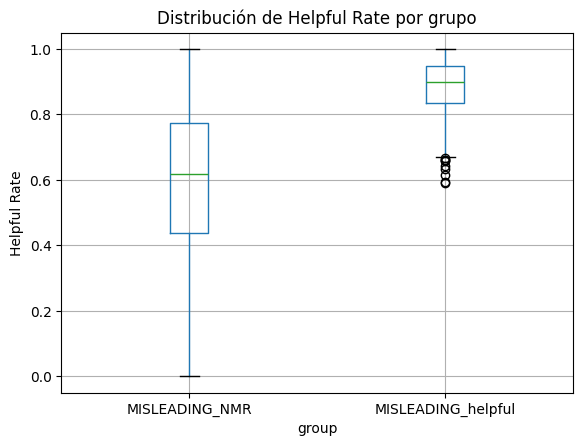

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
comparison_df.boxplot(column='helpful_rate', by='group')
plt.title("Distribución de Helpful Rate por grupo")
plt.ylabel("Helpful Rate")
plt.suptitle("")
plt.show()


<Figure size 800x600 with 0 Axes>

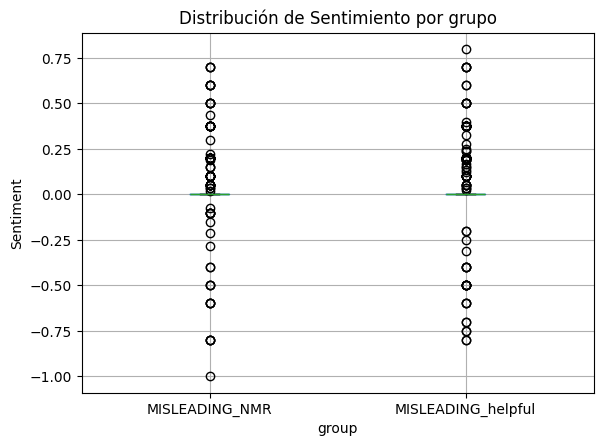

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
comparison_df.boxplot(column='note_sentiment', by='group')
plt.title("Distribución de Sentimiento por grupo")
plt.ylabel("Sentiment")
plt.suptitle("")
plt.show()

## Evaluaciones

                noteId  num_ratings
0  1593282294264958977            3
1  1643782078780014600           37
2  1644131128628989952            1
3  1644160492011913217          127
4  1644164346677800961           75
5  1644169833683066880           78
6  1644200497891643394          111
7  1644212043853996032           51
8  1644217419974541312           56
9  1644231337006579718           76
        num_ratings
count  10137.000000
mean      84.802506
std      143.628350
min        1.000000
25%       12.000000
50%       38.000000
75%      102.000000
max     2947.000000


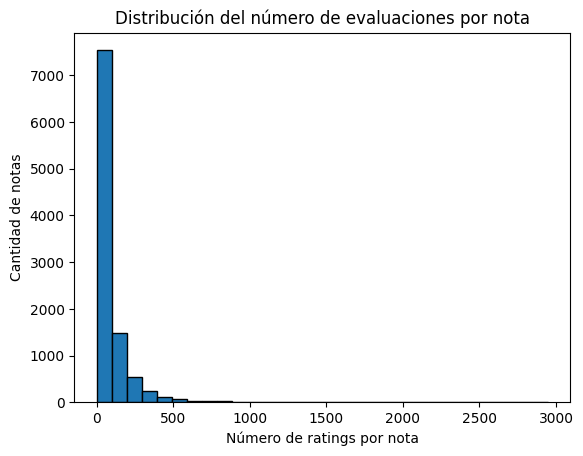

In [ ]:
# Número total de evaluaciones (ratings) por nota
# cada fila = un rating

# contar simplemente el número de filas por noteId
ratings_count_per_note = final_df.groupby("noteId").size().reset_index(name="num_ratings")

# ver primeras filas
print(ratings_count_per_note.head(10))

# estadística descriptiva de cuántos ratings tienen las notas
print(ratings_count_per_note.describe())

# histograma de distribución
import matplotlib.pyplot as plt

plt.hist(ratings_count_per_note["num_ratings"], bins=30, edgecolor="black")
plt.xlabel("Número de ratings por nota")
plt.ylabel("Cantidad de notas")
plt.title("Distribución del número de evaluaciones por nota")
plt.show()

                noteId  num_ratings             tweet_id   likes     views  \
0  1593282294264958977            3  1593262373812445187    3000         4   
1  1643782078780014600           37  1642976364080041984  691000  82200000   
2  1644131128628989952            1  1643259629064028161    1100     63500   
3  1644160492011913217          127  1644091808169988096     108     43600   
4  1644164346677800961           75  1644091808169988096     108     43600   

   replies  reposts  
0     2400      741  
1    23000    63000  
2      332      561  
3       29       60  
4       29       60  
                likes     views   replies   reposts  num_ratings
likes        1.000000  0.493042  0.197018  0.776154     0.203707
views        0.493042  1.000000  0.782101  0.601508     0.380138
replies      0.197018  0.782101  1.000000  0.387003     0.251392
reposts      0.776154  0.601508  0.387003  1.000000     0.325092
num_ratings  0.203707  0.380138  0.251392  0.325092     1.000000


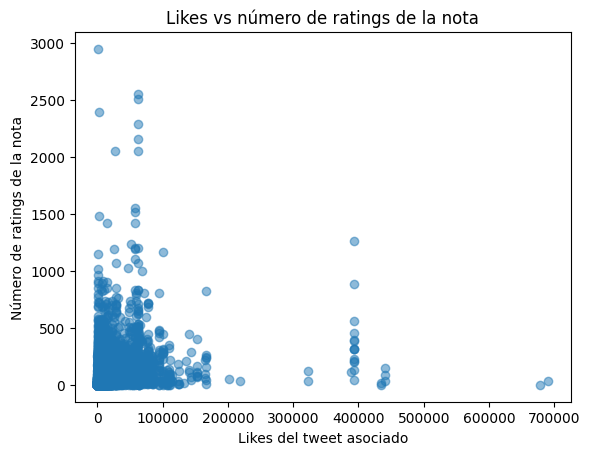

In [ ]:
# 1️⃣ contar el número de ratings por nota
ratings_count_per_note = final_df.groupby("noteId")["raterParticipantId"].count().reset_index()
ratings_count_per_note.rename(columns={"raterParticipantId": "num_ratings"}, inplace=True)

# 2️⃣ unirlo con nota_tuit_df
merged = ratings_count_per_note.merge(
    tuits_notas_unicas[["noteId", "tweet_id", "likes", "views", "replies", "reposts"]],
    on="noteId",
    how="left"

)

# 3️⃣ ver primeras filas
print(merged.head())

# 4️⃣ correlaciones
print(merged[["likes", "views", "replies", "reposts", "num_ratings"]].corr())

# 5️⃣ visual
import matplotlib.pyplot as plt

plt.scatter(merged["likes"], merged["num_ratings"], alpha=0.5)
plt.xlabel("Likes del tweet asociado")
plt.ylabel("Número de ratings de la nota")
plt.title("Likes vs número de ratings de la nota")
plt.show()


# pruebas modelos

| Modelo | Descripción                                                                     | Incluye texto          | Incluye otras features | ¿Balanceado? | Notas                    |
| ------ | ------------------------------------------------------------------------------- | ---------------------- | ---------------------- | ------------ | ------------------------ |
| **1**  | Regresión logística con `summary` (nota)                                        | ✅ Sí (TF-IDF)          | ❌ No                   | ✅ Sí         | Modelo base de texto     |
| **2**  | Regresión logística con `summary` + features estructurales (likes, views, etc.) | ✅ Sí (TF-IDF)          | ✅ Sí                   | ✅ Sí         | Enriquecido              |
| **3**  | Regresión logística con features estructurales y booleanas                      | ❌ No                   | ✅ Sí                   | ✅ Sí         | Ya lo ejecutaste         |
| **4**  | Regresión logística con texto de `summary` + `tweet_text`                       | ✅ Sí (TF-IDF de ambos) | ❌ No                   | ✅ Sí         | Combinado texto          |
| **5**  | Modelo BETO fine-tuneado con texto de nota                                      | ✅ Sí (BERT)            | ❌ No                   | ✅ Sí         | Más costoso pero potente |


# MODELO 1 - SOLO NOTE CLEAN

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


📊 Reporte de clasificación (Modelo 1 - texto limpio):
              precision    recall  f1-score   support

         0.0       0.72      0.54      0.62        85
         1.0       0.76      0.87      0.81       140

    accuracy                           0.75       225
   macro avg       0.74      0.71      0.71       225
weighted avg       0.74      0.75      0.74       225



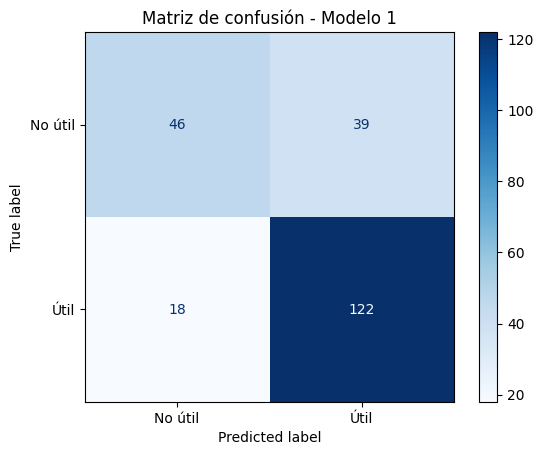

In [ ]:
# 1. Importar librerías
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 2. Definir stopwords en español
spanish_stopwords = stopwords.words('spanish')

# 3. Filtrar notas ya clasificadas (excluye NMR) y con texto limpio
df_model1 = tuits_notas_unicas[
    tuits_notas_unicas['currentStatus'].isin(['CURRENTLY_RATED_HELPFUL', 'CURRENTLY_RATED_NOT_HELPFUL']) &
    tuits_notas_unicas['note_clean'].notna()
].copy()

# 4. Variable X e y
X_text = df_model1['note_clean']
y = df_model1['currentStatus'].map({
    'CURRENTLY_RATED_HELPFUL': 1,
    'CURRENTLY_RATED_NOT_HELPFUL': 0
})

# 5. Vectorización TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2), stop_words=spanish_stopwords)
X_tfidf = vectorizer.fit_transform(X_text)

# 6. División en train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, stratify=y, random_state=42
)

# 7. Modelo de regresión logística
model1 = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
model1.fit(X_train, y_train)

# 8. Evaluación
y_pred = model1.predict(X_test)

print("📊 Reporte de clasificación (Modelo 1 - texto limpio):")
print(classification_report(y_test, y_pred))

# 9. Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No útil', 'Útil'])
disp.plot(cmap="Blues")
plt.title("Matriz de confusión - Modelo 1")
plt.show()


validacion cruzada

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Reutilizamos el modelo ya definido
model1_cv = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

# Aplicamos validación cruzada con 5 folds usando F1 como métrica
scores = cross_val_score(model1_cv, X_tfidf, y, cv=5, scoring='f1')

# Mostrar resultados
print(f"🎯 F1-score medio (validación cruzada 5-fold): {np.mean(scores):.3f}")
print(f"📉 Desviación estándar del F1-score: {np.std(scores):.3f}")


🎯 F1-score medio (validación cruzada 5-fold): 0.820
📉 Desviación estándar del F1-score: 0.006


El modelo obtuvo un F1-score promedio de 0.82 con una desviación estándar de 0.006, lo que sugiere un rendimiento estable y consistente a través de distintas divisiones del conjunto de datos. Este resultado refuerza la solidez del modelo base en la tarea de predecir si una nota será clasificada como útil o no útil en función exclusivamente de su contenido textual.

# MODELO 2 - NOTE CLEAN Y FEATURES

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


📊 Reporte de clasificación (Modelo 2 - texto + estructurales):
              precision    recall  f1-score   support

         0.0       0.85      0.86      0.85        85
         1.0       0.91      0.91      0.91       140

    accuracy                           0.89       225
   macro avg       0.88      0.88      0.88       225
weighted avg       0.89      0.89      0.89       225



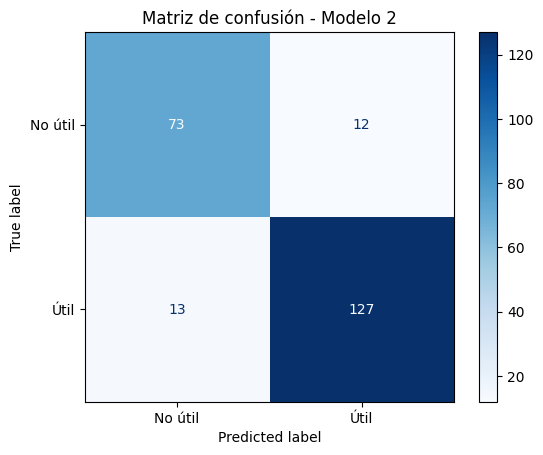

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack
import matplotlib.pyplot as plt

# 1. Definir stopwords en español
spanish_stopwords = stopwords.words('spanish')

# 2. Filtrar notas ya clasificadas y sin nulos críticos
df_model2 = tuits_notas_unicas[
    tuits_notas_unicas['currentStatus'].isin(['CURRENTLY_RATED_HELPFUL', 'CURRENTLY_RATED_NOT_HELPFUL']) &
    tuits_notas_unicas['note_clean'].notna()
].copy()

# 3. Crear variable objetivo binaria
y = df_model2['currentStatus'].map({
    'CURRENTLY_RATED_HELPFUL': 1,
    'CURRENTLY_RATED_NOT_HELPFUL': 0
})

# 4. Vectorización TF-IDF sobre 'note_clean'
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2), stop_words=spanish_stopwords)
X_text = vectorizer.fit_transform(df_model2['note_clean'])

# 5. Variables estructurales (rellenar NaNs con 0)
features_numericas = [
    'note_length', 'tweet_length',
    'likes', 'views', 'reposts', 'replies', 'bookmarks',
    'note_sentiment',
    'trustworthySources',
    'helpfulGoodSources', 'helpfulAddressesClaim', 'helpfulClear',
    'notHelpfulSpamHarassmentOrAbuse', 'notHelpfulSourcesMissingOrUnreliable',
    'notHelpfulMissingKeyPoints'
]

X_struct = df_model2[features_numericas].fillna(0)

# 6. Estandarizar variables numéricas
scaler = StandardScaler()
X_struct_scaled = scaler.fit_transform(X_struct)

# 7. Combinar texto + estructurales
X_final = hstack([X_text, X_struct_scaled])

# 8. División train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.2, stratify=y, random_state=42
)

# 9. Entrenar modelo
model2 = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
model2.fit(X_train, y_train)

# 10. Evaluación
y_pred = model2.predict(X_test)
print("📊 Reporte de clasificación (Modelo 2 - texto + estructurales):")
print(classification_report(y_test, y_pred))

# 11. Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No útil', 'Útil'])
disp.plot(cmap="Blues")
plt.title("Matriz de confusión - Modelo 2")
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128285 (\N{TOP WITH UPWARDS ARROW ABOVE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


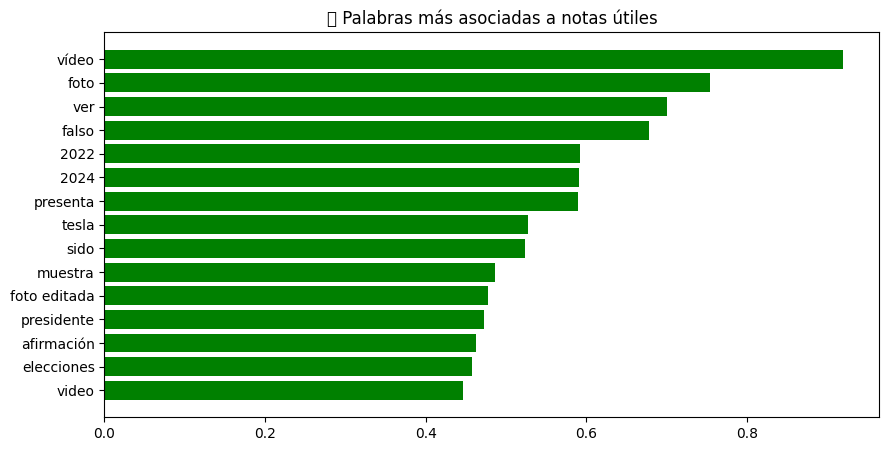

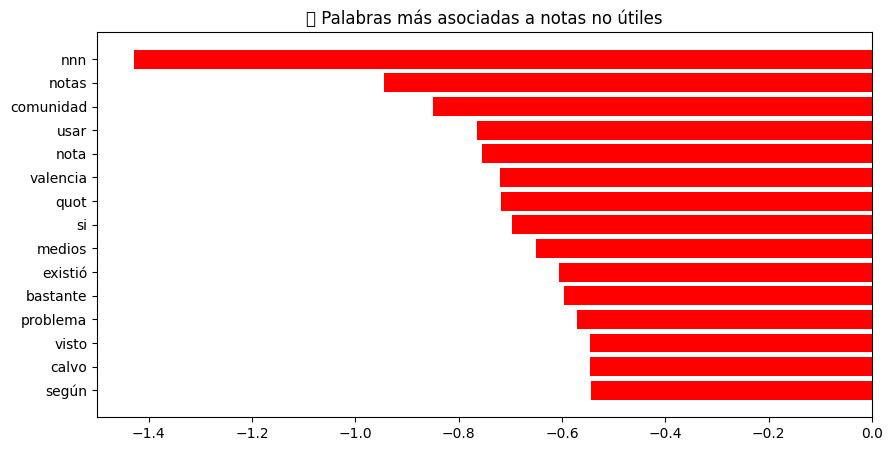

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127959 (\N{BUILDING CONSTRUCTION}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


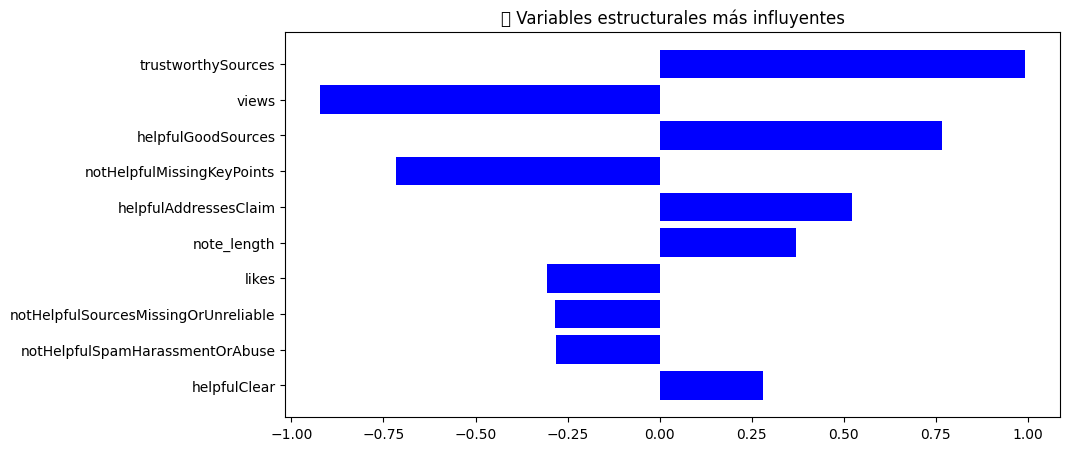

🔝 Palabras predictoras de utilidad:
            feature      coef
4937         vídeo  0.919135
3235          foto  0.754123
4862           ver  0.700384
3184         falso  0.678493
52            2022  0.592443
54            2024  0.590806
4220      presenta  0.589864
4701         tesla  0.527026
4585          sido  0.524002
3867       muestra  0.486244
3239  foto editada  0.478134
4236    presidente  0.472081
158     afirmación  0.463241
2997    elecciones  0.457843
4885         video  0.446860

🔻 Palabras predictoras de no utilidad:
         feature      coef
3938        nnn -1.428244
3964      notas -0.945024
1766  comunidad -0.849113
4800       usar -0.764980
3959       nota -0.755426
4825   valencia -0.719437
4377       quot -0.717608
4581         si -0.696899
3766     medios -0.649513
3140    existió -0.605144
342    bastante -0.596067
4258   problema -0.571204
4910      visto -0.546701
657       calvo -0.545718
4552      según -0.544843

📊 Variables estructurales más relevantes:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1️⃣ Obtener coeficientes del modelo ya entrenado
coeficientes = model2.coef_[0]

# 2️⃣ Separar nombres de features de texto (TF-IDF) y estructurales
# (Asegúrate de que X_struct.columns esté definido)
features_texto = vectorizer.get_feature_names_out()
features_estructurales = features_numericas  # ya definidas en tu código

# 3️⃣ Concatenar todos los nombres de features (TF-IDF primero, luego estructurales)
features_totales = np.concatenate([features_texto, features_estructurales])

# 4️⃣ Crear DataFrame de coeficientes
df_coef = pd.DataFrame({
    'feature': features_totales,
    'coef': coeficientes
})

# 5️⃣ Palabras más asociadas a notas útiles (coeficiente más positivo)
top_palabras_util = df_coef[df_coef['feature'].isin(features_texto)].sort_values(by='coef', ascending=False).head(15)

# 6️⃣ Palabras más asociadas a notas no útiles (coeficiente más negativo)
top_palabras_no_util = df_coef[df_coef['feature'].isin(features_texto)].sort_values(by='coef').head(15)

# 7️⃣ Variables estructurales con más peso absoluto
df_struct = df_coef[df_coef['feature'].isin(features_estructurales)]
top_struct = df_struct.reindex(df_struct['coef'].abs().sort_values(ascending=False).index).head(10)

# 8️⃣ Gráficas
plt.figure(figsize=(10, 5))
plt.barh(top_palabras_util['feature'], top_palabras_util['coef'], color='green')
plt.title("🔝 Palabras más asociadas a notas útiles")
plt.gca().invert_yaxis()
plt.show()

plt.figure(figsize=(10, 5))
plt.barh(top_palabras_no_util['feature'], top_palabras_no_util['coef'], color='red')
plt.title("🔝 Palabras más asociadas a notas no útiles")
plt.gca().invert_yaxis()
plt.show()

plt.figure(figsize=(10, 5))
plt.barh(top_struct['feature'], top_struct['coef'], color='blue')
plt.title("🏗️ Variables estructurales más influyentes")
plt.gca().invert_yaxis()
plt.show()

# 9️⃣ (Opcional) Mostrar en consola
print("🔝 Palabras predictoras de utilidad:\n", top_palabras_util[['feature', 'coef']])
print("\n🔻 Palabras predictoras de no utilidad:\n", top_palabras_no_util[['feature', 'coef']])
print("\n📊 Variables estructurales más relevantes:\n", top_struct[['feature', 'coef']])


validacion cruzada

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, f1_score

# ⚙️ Mismo modelo
model_cv = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

# 🧪 Validación cruzada estratificada (5 folds)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model_cv, X_final, y, cv=cv, scoring=make_scorer(f1_score))

# 📊 Resultados
print(f"F1-score promedio (validación cruzada): {scores.mean():.3f}")
print(f"Desviación estándar: {scores.std():.3f}")


F1-score promedio (validación cruzada): 0.911
Desviación estándar: 0.021


El modelo obtuvo un F1-score promedio de 0.911, con una desviación estándar de 0.021. Este resultado indica que el rendimiento del modelo es elevado y estable frente a diferentes particiones de los datos, lo que sugiere una buena capacidad de generalización.

# Modelo 3: Solo features estructurales y etiquetas booleanas

## preparar variabels para modelo


📊 Estadísticas descriptivas:


,note_sentiment,note_length,tweet_length,likes,views,replies,reposts,bookmarks
count,1121.000000,1121.000000,1121.000000,754.0,721.0,749.0,754.0,755.0
mean,0.014215,156.369313,168.383586,15567.917772,2421977.242718,2333.922563,3428.245358,6530.727152
std,0.134968,77.941743,281.845058,35873.690997,6375918.72987,8414.898827,7816.421146,113365.223567
min,-0.800000,2.000000,0.000000,3.0,2.0,2.0,2.0,1.0
25%,0.000000,91.000000,0.000000,1600.0,223700.0,210.0,519.0,51.5
50%,0.000000,149.000000,99.000000,5800.0,814900.0,643.0,1450.0,177.0
75%,0.000000,228.000000,238.000000,15000.0,2000000.0,1700.0,3600.0,735.5
max,0.800000,308.000000,2627.000000,691000.0,82200000.0,135500.0,118800.0,3000000.0


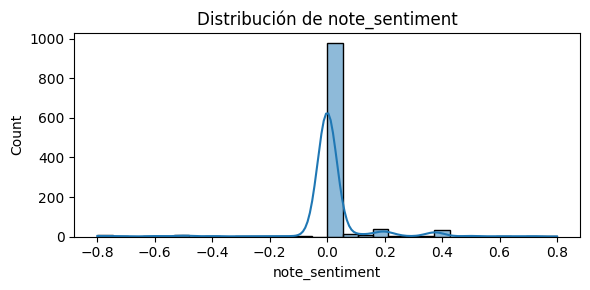

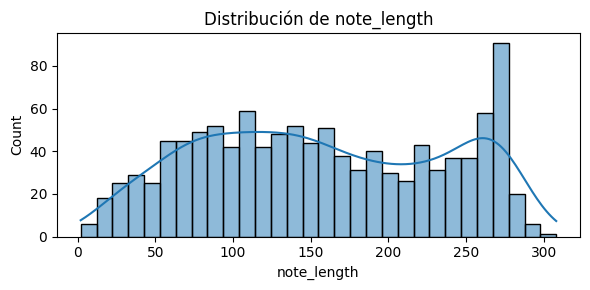

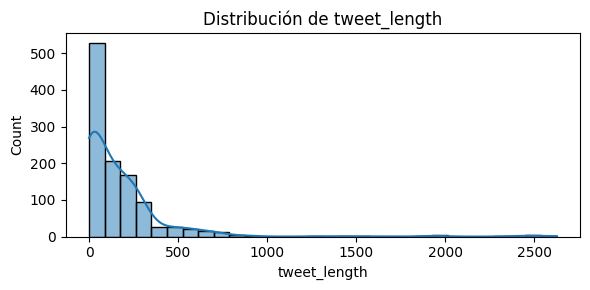

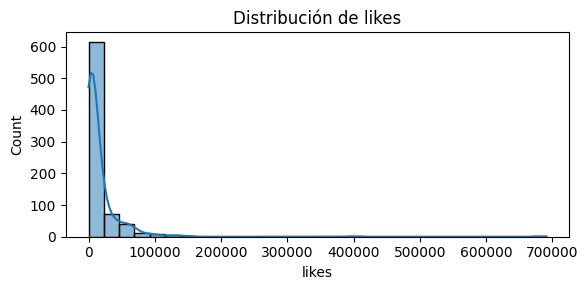

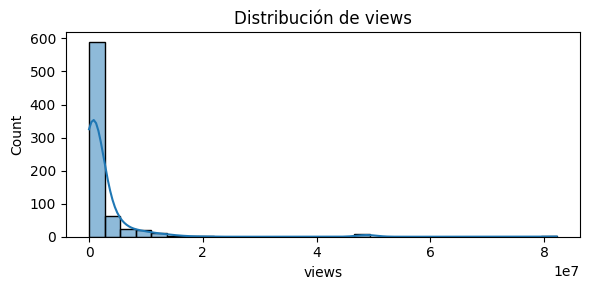

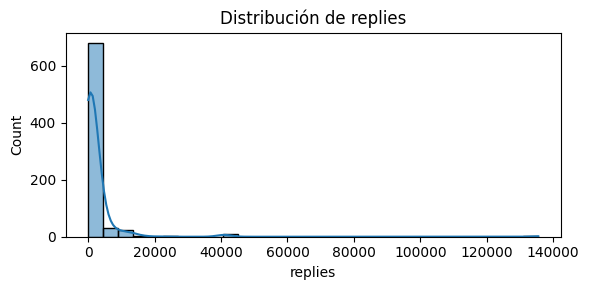

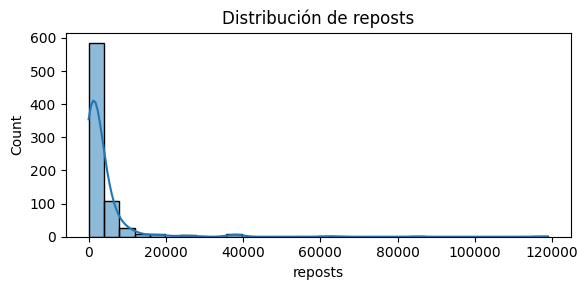

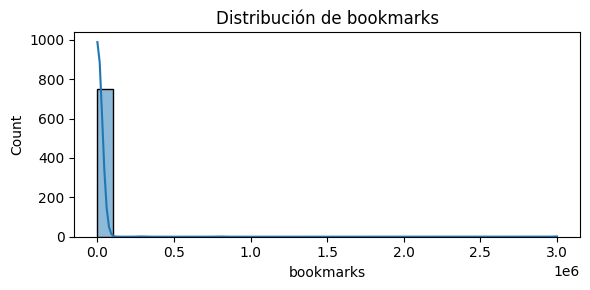

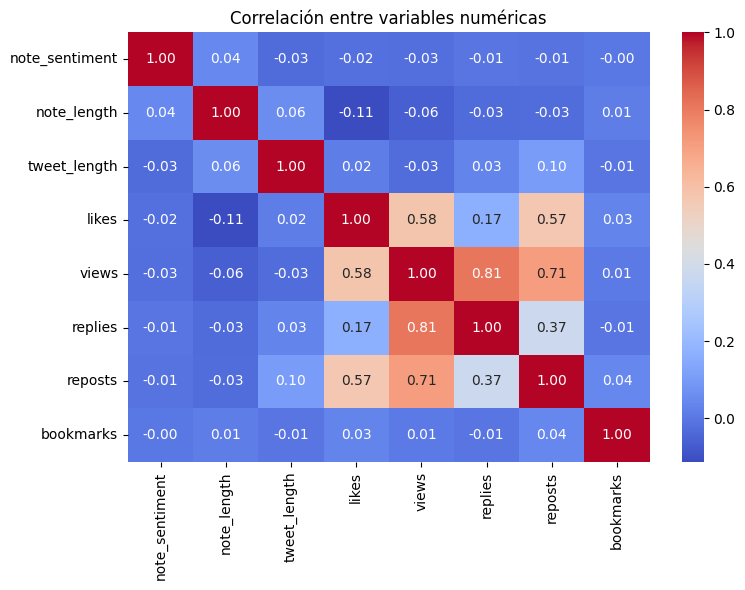


📌 Proporción de True en variables booleanas:


,0
disagree,0.000000
agree,0.000000
notMisleadingOutdatedButNotWhenWritten,0.017841
isMediaNote,0.029438
notMisleadingOther,0.031222
notMisleadingClearlySatire,0.033006
notHelpfulOther,0.033898
helpfulOther,0.046387
notHelpfulHardToUnderstand,0.053524
notMisleadingPersonalOpinion,0.071365


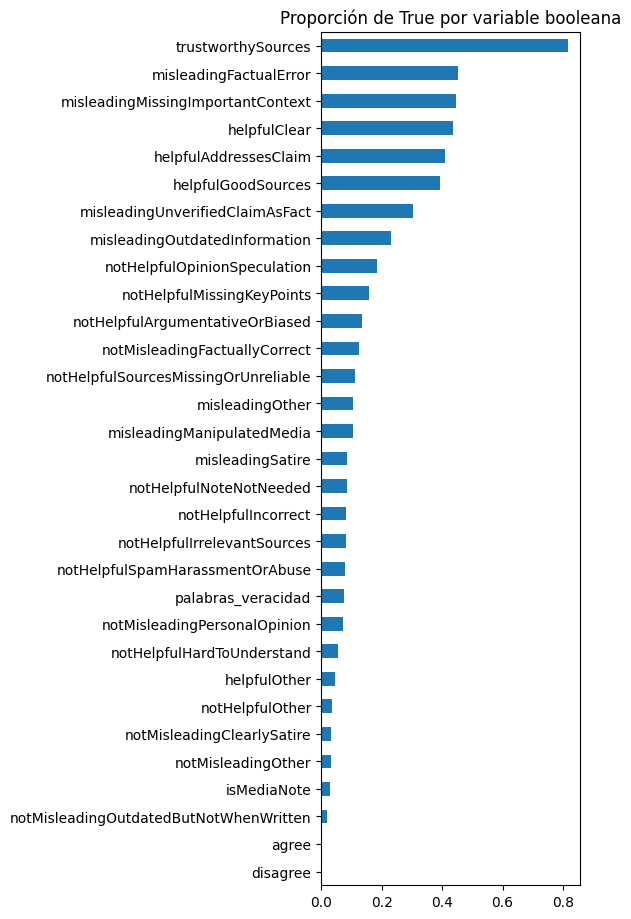


✅ Variables finales para el modelo: ['note_sentiment', 'note_length', 'tweet_length', 'likes', 'views', 'replies', 'reposts', 'bookmarks', 'isMediaNote', 'notMisleadingOther', 'notMisleadingClearlySatire', 'notHelpfulOther', 'helpfulOther', 'notHelpfulHardToUnderstand', 'notMisleadingPersonalOpinion', 'palabras_veracidad', 'notHelpfulSpamHarassmentOrAbuse', 'notHelpfulIrrelevantSources', 'notHelpfulIncorrect', 'notHelpfulNoteNotNeeded', 'misleadingSatire', 'misleadingManipulatedMedia', 'misleadingOther', 'notHelpfulSourcesMissingOrUnreliable', 'notMisleadingFactuallyCorrect', 'notHelpfulArgumentativeOrBiased', 'notHelpfulMissingKeyPoints', 'notHelpfulOpinionSpeculation', 'misleadingOutdatedInformation', 'misleadingUnverifiedClaimAsFact', 'helpfulGoodSources', 'helpfulAddressesClaim', 'helpfulClear', 'misleadingMissingImportantContext', 'misleadingFactualError', 'trustworthySources']
🔢 Tamaño del dataset final: (1121, 36)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# 1️⃣ --- Filtrar notas útiles / no útiles (excluyendo NMR) ---
df_model = tuits_notas_unicas[
    tuits_notas_unicas['currentStatus'].isin(['CURRENTLY_RATED_HELPFUL', 'CURRENTLY_RATED_NOT_HELPFUL'])
].copy()

# 2️⃣ --- Variable objetivo ---
df_model['is_helpful'] = df_model['currentStatus'].apply(
    lambda x: 1 if x == 'CURRENTLY_RATED_HELPFUL' else 0
)

# 3️⃣ --- Calcular longitudes si no existen ---
if 'note_length' not in df_model.columns:
    df_model['note_length'] = df_model['note_clean'].str.len()

if 'tweet_length' not in df_model.columns:
    df_model['tweet_length'] = df_model['tweet_clean'].str.len()

# 4️⃣ --- Variables numéricas candidatas ---
num_vars = [
    'note_sentiment', 'note_length', 'tweet_length',
    'likes', 'views', 'replies', 'reposts', 'bookmarks'
]

# 5️⃣ --- Revisar estadísticas ---
print("\n📊 Estadísticas descriptivas:")
display(df_model[num_vars].describe())

# 6️⃣ --- Histogramas numéricos ---
for col in num_vars:
    plt.figure(figsize=(6, 3))
    sns.histplot(df_model[col], bins=30, kde=True)
    plt.title(f'Distribución de {col}')
    plt.tight_layout()
    plt.show()

# 7️⃣ --- Correlaciones ---
corr = df_model[num_vars].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlación entre variables numéricas")
plt.tight_layout()
plt.show()

# 8️⃣ --- Revisar variables booleanas ---
bool_cols = [col for col in df_model.columns if df_model[col].dtype == 'bool']

print("\n📌 Proporción de True en variables booleanas:")
bool_props = df_model[bool_cols].mean().sort_values()
display(bool_props)

# Opcional: graficar
plt.figure(figsize=(6, len(bool_cols)*0.3))
bool_props.plot(kind='barh')
plt.title("Proporción de True por variable booleana")
plt.tight_layout()
plt.show()

# 9️⃣ --- Eliminar booleanas con baja frecuencia (menos del 2%) ---
booleanas_filtradas = bool_props[bool_props >= 0.02].index.tolist()

# 1️⃣0️⃣ --- Estandarizar solo las numéricas ---
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(df_model[num_vars])

# 1️⃣1️⃣ --- Dataset listo para modelar ---
X_final = pd.concat([
    pd.DataFrame(X_num_scaled, columns=num_vars, index=df_model.index),
    df_model[booleanas_filtradas]
], axis=1)

y_final = df_model["is_helpful"]

print("\n✅ Variables finales para el modelo:", X_final.columns.tolist())
print("🔢 Tamaño del dataset final:", X_final.shape)


📉 Variables numéricas:
La mayoría están muy sesgadas a la derecha (likes, views, reposts, etc.), pero como ya estandarizaste con StandardScaler, no hace falta transformarlas ahora (ni log-transform).

note_sentiment: la mayoría son neutras (~0), pero hay algunos valores dispersos que pueden aportar.

note_length tiene una distribución más normalizada → buena candidata.

Hay colinealidad alta entre:
likes, views, reposts, replies → ⚠️ puede causar redundancia.

📌 Variables booleanas:
Algunas tienen muy poca frecuencia, pero ya filtraste bien.

Las que destacan: trustworthySources, misleadingFactualError, helpfulClear, etc. → ¡buenas candidatas!

In [ ]:
# Cuántos NaNs hay en cada columna numérica
df_model[numeric_cols].isna().sum()


NameError: name 'numeric_cols' is not defined

In [ ]:
# rellenar nan con 0
engagement_cols = ['likes', 'views', 'replies', 'reposts', 'bookmarks']
df_model[engagement_cols] = df_model[engagement_cols].fillna(0)


In [ ]:
df_model[numeric_cols].isna().any(axis=1).sum()


np.int64(400)

In [ ]:
# 1. Recuento de clases
print("Recuento de clases:")
print(df_model['is_helpful'].value_counts())  # 1 = útil, 0 = no útil

Recuento de clases:
is_helpful
1    697
0    424
Name: count, dtype: int64



Reporte de clasificación:
              precision    recall  f1-score   support

           0      0.833     0.882     0.857        85
           1      0.926     0.893     0.909       140

    accuracy                          0.889       225
   macro avg      0.880     0.888     0.883       225
weighted avg      0.891     0.889     0.889       225



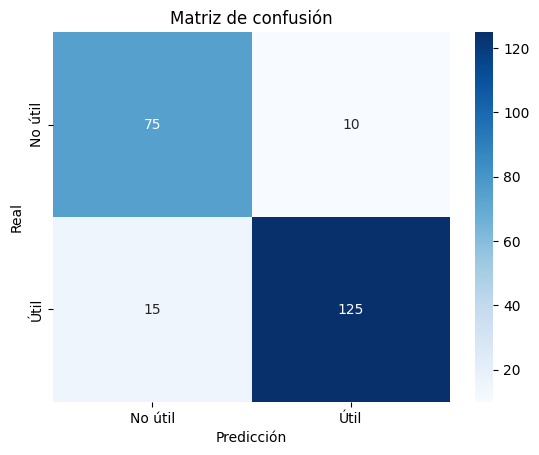

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# 2. Variables predictoras y objetivo
X = df_model[[
    'note_sentiment', 'note_length', 'tweet_length',
    'likes', 'views', 'replies', 'reposts', 'bookmarks',
    'isMediaNote', 'notMisleadingOther', 'notMisleadingClearlySatire',
    'notHelpfulOther', 'helpfulOther', 'notHelpfulHardToUnderstand',
    'notMisleadingPersonalOpinion', 'palabras_veracidad',
    'notHelpfulSpamHarassmentOrAbuse', 'notHelpfulIrrelevantSources',
    'notHelpfulIncorrect', 'notHelpfulNoteNotNeeded',
    'misleadingSatire', 'misleadingManipulatedMedia', 'misleadingOther',
    'notHelpfulSourcesMissingOrUnreliable', 'notMisleadingFactuallyCorrect',
    'notHelpfulArgumentativeOrBiased', 'notHelpfulMissingKeyPoints',
    'notHelpfulOpinionSpeculation', 'misleadingOutdatedInformation',
    'misleadingUnverifiedClaimAsFact', 'helpfulGoodSources',
    'helpfulAddressesClaim', 'helpfulClear', 'misleadingMissingImportantContext',
    'misleadingFactualError', 'trustworthySources'
]]
y = df_model['is_helpful']

# 3. División train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# 4. Estandarización de variables numéricas
numeric_cols = ['note_sentiment', 'note_length', 'tweet_length',
                'likes', 'views', 'replies', 'reposts', 'bookmarks']
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

# 5. Modelo de regresión logística con penalización de clase
model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# 6. Evaluación
y_pred = model.predict(X_test)

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred, digits=3))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No útil', 'Útil'], yticklabels=['No útil', 'Útil'])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de confusión")
plt.show()


coeficientes

/tmp/ipython-input-67-143028420.py:26: UserWarning: Glyph 128285 (\N{TOP WITH UPWARDS ARROW ABOVE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128285 (\N{TOP WITH UPWARDS ARROW ABOVE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


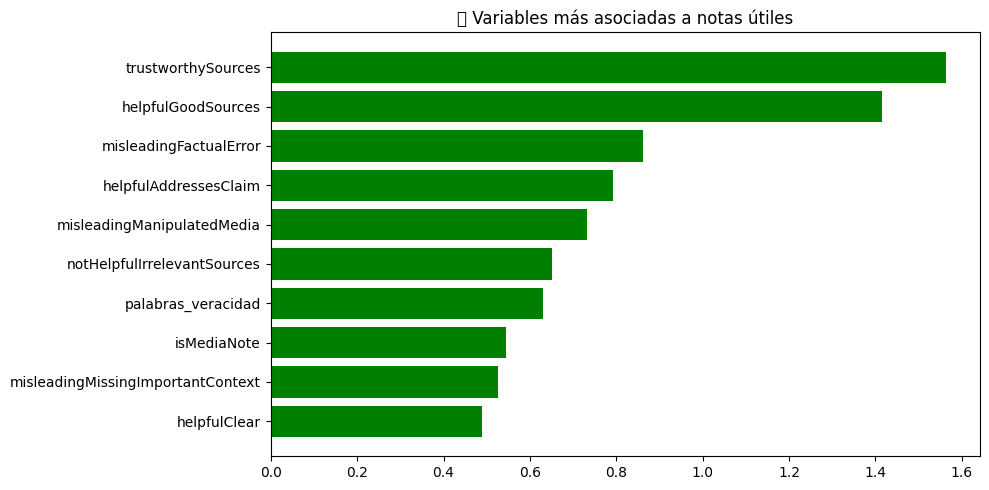

/tmp/ipython-input-67-143028420.py:33: UserWarning: Glyph 128315 (\N{DOWN-POINTING RED TRIANGLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128315 (\N{DOWN-POINTING RED TRIANGLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


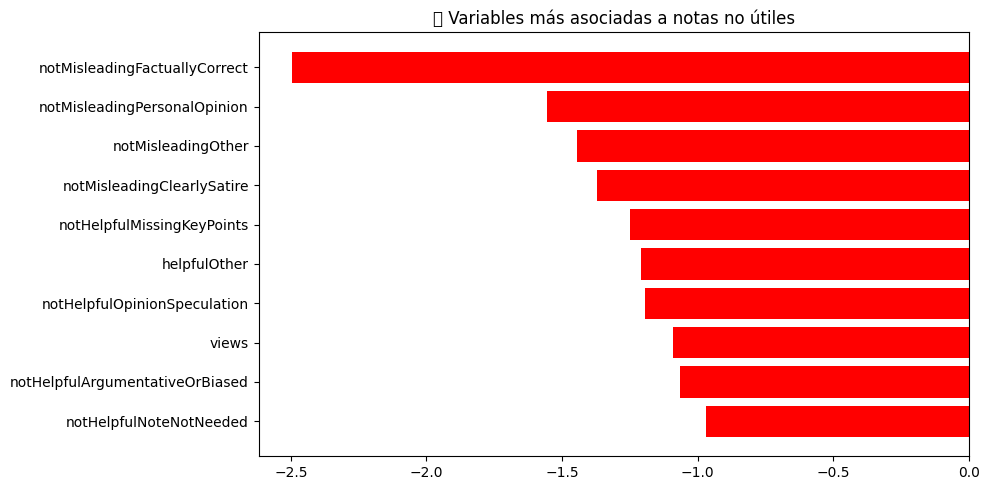

Variables más predictivas (útiles):
                               feature      coef
35                 trustworthySources  1.563753
30                 helpfulGoodSources  1.414815
34             misleadingFactualError  0.861335
31              helpfulAddressesClaim  0.792691
21         misleadingManipulatedMedia  0.732495
17        notHelpfulIrrelevantSources  0.651067
15                 palabras_veracidad  0.629293
8                         isMediaNote  0.544492
33  misleadingMissingImportantContext  0.526010
32                       helpfulClear  0.488638

Variables más predictivas (no útiles):
                             feature      coef
24    notMisleadingFactuallyCorrect -2.494000
14     notMisleadingPersonalOpinion -1.556269
9                notMisleadingOther -1.444466
10       notMisleadingClearlySatire -1.370361
26       notHelpfulMissingKeyPoints -1.249293
12                     helpfulOther -1.210927
27     notHelpfulOpinionSpeculation -1.193816
4                         

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1️⃣ Obtener coeficientes
coeficientes = model.coef_[0]

# 2️⃣ Crear DataFrame con nombres de variables y coeficientes
features = X.columns  # Asegúrate de que sea el mismo X usado para entrenar
df_coef = pd.DataFrame({
    'feature': features,
    'coef': coeficientes
})

# 3️⃣ Seleccionar top 10 coeficientes positivos (más asociados a notas útiles)
top_positivos = df_coef.sort_values(by='coef', ascending=False).head(10)

# 4️⃣ Seleccionar top 10 coeficientes negativos (más asociados a notas no útiles)
top_negativos = df_coef.sort_values(by='coef').head(10)

# 5️⃣ Visualización
plt.figure(figsize=(10, 5))
plt.barh(top_positivos['feature'], top_positivos['coef'], color='green')
plt.title("🔝 Variables más asociadas a notas útiles")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
plt.barh(top_negativos['feature'], top_negativos['coef'], color='red')
plt.title("🔻 Variables más asociadas a notas no útiles")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# (Opcional) Mostrar en consola
print("Variables más predictivas (útiles):\n", top_positivos)
print("\nVariables más predictivas (no útiles):\n", top_negativos)


# MODELO 4 - COMBINAR TEXTO TWEET Y NOTA

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


📊 Reporte de clasificación (Modelo 4 - nota + tweet):
              precision    recall  f1-score   support

         0.0       0.67      0.69      0.68        62
         1.0       0.78      0.76      0.77        88

    accuracy                           0.73       150
   macro avg       0.73      0.73      0.73       150
weighted avg       0.73      0.73      0.73       150



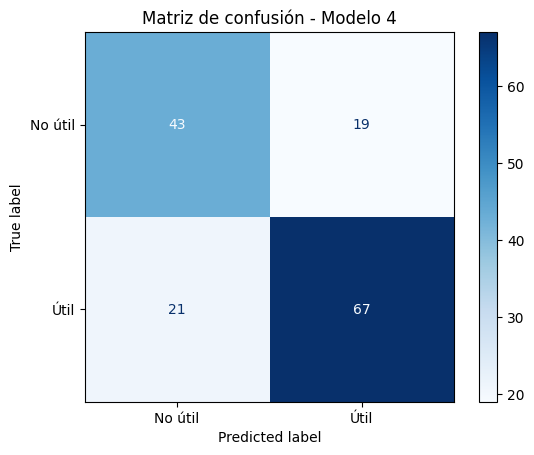

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Stopwords en español
spanish_stopwords = stopwords.words('spanish')

# 2. Dataset base
df_model4 = tuits_notas_unicas[
    tuits_notas_unicas['currentStatus'].isin(['CURRENTLY_RATED_HELPFUL', 'CURRENTLY_RATED_NOT_HELPFUL']) &
    tuits_notas_unicas['note_clean'].notna() &
    tuits_notas_unicas['tweet_clean'].notna()
].copy()

# 3. Variable objetivo
y = df_model4['currentStatus'].map({
    'CURRENTLY_RATED_HELPFUL': 1,
    'CURRENTLY_RATED_NOT_HELPFUL': 0
})

# 4. Combinar texto de nota y tweet
df_model4['combined_text'] = df_model4['note_clean'] + " " + df_model4['tweet_clean']

# 5. Vectorización TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2), stop_words=spanish_stopwords)
X_text = vectorizer.fit_transform(df_model4['combined_text'])

# 6. División train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_text, y, test_size=0.2, stratify=y, random_state=42
)

# 7. Entrenamiento
model4 = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
model4.fit(X_train, y_train)

# 8. Evaluación
y_pred = model4.predict(X_test)
print("📊 Reporte de clasificación (Modelo 4 - nota + tweet):")
print(classification_report(y_test, y_pred))

# 9. Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No útil', 'Útil'])
disp.plot(cmap="Blues")
plt.title("Matriz de confusión - Modelo 4")
plt.show()


| Modelo                         | Accuracy | Recall útil | Recall no útil | F1 macro |
| ------------------------------ | -------- | ----------- | -------------- | -------- |
| **Modelo 1 (nota)**            | 0.75     | **0.87**    | 0.54           | 0.71     |
| **Modelo 2 (nota + features)** | **0.89** | **0.91**    | **0.86**       | **0.88** |
| **Modelo 4 (nota + tuit)**     | 0.73     | 0.76        | 0.69           | 0.73     |


# MODELO 5 - BETO

In [ ]:
!pip install transformers datasets evaluate -q


In [ ]:
# 🔇 Desactivar Weight & Biases
import os
os.environ["WANDB_DISABLED"] = "true"


In [ ]:
import pandas as pd

# Cargar CSV
df = pd.read_csv("/content/drive/MyDrive/TFM/tuits_notas_unicas.csv")

# Filtrar notas útiles o no útiles (excluye NMR) y que tengan texto
filtro = (
    df['currentStatus'].isin(['CURRENTLY_RATED_HELPFUL', 'CURRENTLY_RATED_NOT_HELPFUL']) &
    df['note_clean'].notna()
)
df = df[filtro].copy()

# Crear variable objetivo binaria
df['is_helpful'] = (df['currentStatus'] == 'CURRENTLY_RATED_HELPFUL').astype(int)

# Subsampleo balanceado (opcional, por rendimiento)
min_count = df['is_helpful'].value_counts().min()
df_balanced = pd.concat([
    df[df['is_helpful'] == 1].sample(min_count, random_state=42),
    df[df['is_helpful'] == 0].sample(min_count, random_state=42)
]).sample(frac=1, random_state=42)  # mezcla final


In [ ]:
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer

# Dividir
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df_balanced['note_clean'].tolist(),
    df_balanced['is_helpful'].tolist(),
    test_size=0.2,
    random_state=42,
    stratify=df_balanced['is_helpful']
)

# Tokenizador de BETO
model_name = "dccuchile/bert-base-spanish-wwm-cased"
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Tokenizar
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=512)
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=512)


In [ ]:
import torch

class NotesDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
    def __len__(self):
        return len(self.labels)
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

train_dataset = NotesDataset(train_encodings, train_labels)
val_dataset = NotesDataset(val_encodings, val_labels)


In [ ]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer
import evaluate

# Modelo base con capa de clasificación binaria
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

# Métricas
accuracy = evaluate.load("accuracy")
precision = evaluate.load("precision")
recall = evaluate.load("recall")
f1 = evaluate.load("f1")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = logits.argmax(axis=1)
    return {
        "accuracy": accuracy.compute(predictions=preds, references=labels)["accuracy"],
        "precision": precision.compute(predictions=preds, references=labels, average="binary")["precision"],
        "recall": recall.compute(predictions=preds, references=labels, average="binary")["recall"],
        "f1": f1.compute(predictions=preds, references=labels, average="binary")["f1"],
    }

# Argumentos de entrenamiento
training_args = TrainingArguments(
    output_dir="./beto_results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
    report_to="none"  # 👈 esto desactiva los logs hacia W&B y TensorBoard
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipython-input-82-1695544233.py:35: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
trainer.train()


Step,Training Loss


TrainOutput(global_step=129, training_loss=0.3458555354628452, metrics={'train_runtime': 2831.0753, 'train_samples_per_second': 0.718, 'train_steps_per_second': 0.046, 'total_flos': 134837221429080.0, 'train_loss': 0.3458555354628452, 'epoch': 3.0})

In [ ]:
trainer.evaluate()


{'eval_loss': 0.4662594199180603,
 'eval_accuracy': 0.8294117647058824,
 'eval_precision': 0.7978723404255319,
 'eval_recall': 0.8823529411764706,
 'eval_f1': 0.8379888268156425,
 'eval_runtime': 40.5922,
 'eval_samples_per_second': 4.188,
 'eval_steps_per_second': 0.271,
 'epoch': 3.0}

In [ ]:
# desactivar weihgt and biases
import os
os.environ["WANDB_DISABLED"] = "true"
